<font color='#457B9D' size='6'><strong>PREVISÃO DE ALUNOS ATIVOS PROPENSOS A EVADIR</strong></font>
 
<font size='4'><strong>Projeto final da disciplina Inteligência Computacional III</strong></font><br>
<font size='4'>Prof. Dr. Ricardo Rios</font>
<Br>
<br>
<font color='457B9D' size='4'><strong>Dárcio Santos Rocha e Iury Gomes de Oliveira</strong></font><br>
<font size='4'>Mestrado em Ciência da Computação - UFBA</font>
<br>
<br>

<font size='6' color='#457B9D'><strong>Introdução</strong></font>

---

O problema da evasão no ambiente universitário tem sido motivo de estudos em todo Brasil. É cada vez maior o interesse dos gestores públicos e da sociedade civil em conhecer as causas e as taxas de evasão nos cursos do ensino superior, principalmente motivados pelo aumento cada vez meior dessas taxas. 

Cada vaga ociosa gera custos para o Poder Público, uma vez que a Universidade mantém a mesma infraestrutura física e de pessoal para um número reduzido de alunos.

O **objetivo** deste trabalho é prever a probabilidade de alunos ativos evadirem nos próximos semestres, considerando dados de seu perfil acadêmico.

O recorte escolhido para análise dos dados foi de todos alunos que ingressaram entre 1999 e 2019, portanto, 21 anos.


#### Dicionário de dados:

* **id_cript**: ID do aluno  
* **sexo**: Sexo  
* **estado_civil**: Estado Civil  
* **cotista**: Informa se o alunos ingressou pelo regime de cotas  
* **etnia**: Cor/raça     
* **deficiencia**: Indica o aluno possui ou não qualquer tipo de deficiência  
* **idade_na_saida**: Idade do aluno em seu egresso. Para os alunos em atividade esta é sua idade na presente data (12/05/2021)  
* **mora_campus_onde_estuda**: Indica se o aluno mora na cidade do campus em que ele estuda  
* **tempo_que_concluiu_ensino_medio**: Quantidade de semestres que concluiu o ensino médio à época de seu ingresso  
* **grupo_forma_ingresso**: Vestibular, Sisu e outras  
* **matutino**: O curso do aluno possui aulas no turno matutino?   
* **vespertino**: O curso do aluno possui aulas no turno vespertino?  
* **noturno**: O curso do aluno possui aulas no turno noturno?   
* **periodo_aluno**: Representa o semestre (turma) do curso que o aluno está matriculado  
* **percentual_cumprido**: Percentual de cumprimento do curso  
* **quant_trancamentos**: Quantidade de vezes que o aluno realizou trancamento parcial ou total  
* **tipo_retencao**: Retenção é a quantidade de tempo que o aluno continua ativo no curso além do prazo normal de concluir  
* **score**: Média global do aluno   
* **ano_ingresso**: Ano que ingressou no curso  
* **ano_saida**: Ano que egressou do curso, por formatura ou evasão   
* **tempo_no_curso_semestre**: Quantidade de semestres que o aluno permaneceu no curso até o egresso, ou até a presente data (2021) se ativo
* **curso**: Nome do curso  
* <font color='navy'><b>grupo_forma_saida</b></font>: Classe que se deseja prever. Indica se o aluno egressou do curso por formatura ou por evasão. A classe 'ATIVO' representa os alunos que se pretende prever seu egresso, se ele irá concluir o curso (formar) ou irá deixá-lo antes (evadir).

<br> 

<font size='6' color='#457B9D'><strong>Agenda</strong></font><a class="anchor" id="topo"></a>

---


* [Limpeza de dados](#0.1)
* [Tratamento de Dados Ausentes](#0.2)
* [Análise Exploratória](#1)
    * Corrigir dados
    * Agrupar dados
    * Compartimentar dados
* [Análise da Evasão por Curso](#2)
    * Evasão Total
    * Evasão Anual
    * Análise exploratória do curso selecionado
* [Pré-processamento dos dados para Machine Learning](#3)
    * Excluir colunas desnecessárias 
    * Padronizar variáveis contínuas
    * Dataset com variáveis categóricas Codificadas (LabelEncoder)
    * Dataset com variáveis categóricas Dummies (OneHotEncoder)
    * Dividir dataset (X e y)
    * Divisão de dados para Treino e Testes
* [Aplicação de Modelos de Aprendizado de Máquina](#4)
    * KNN
    * Decision Tree
    * Random Florest
    * XGBoost
    * SVM
* [Avaliação dos Modelos](#5)
    * Curva ROC
    * Área sob a Curva ROC
* [Unir força dos dois melhores modelos (Ensemble)](#6)
* [Relação de alunos ativos com grande possibilidade de evasão](#7)


<br>



### Importação de bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Modelos de ML
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#from sklearn.ensemble import AdaBoostClassifier
#!pip install xgboost
from xgboost import XGBClassifier
import xgboost as xgb
from xgboost import plot_importance

#Otimização
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import StratifiedShuffleSplit
#from sklearn.model_selection import KFold
#from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold

#Imputação de dados ausentes
from sklearn.impute import SimpleImputer

#Divisão de dados e avalização de modelos
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

#Padronização, normalização, codificação
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
#from sklearn.preprocessing import StandardScaler

#Cuso ROC
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

#Visualização Decision Tree
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import io

# Importando os módulos de cálculo de métricas
#from sklearn.metrics import make_scorer
#from sklearn.metrics import precision_score
#from sklearn.metrics import accuracy_score
#from sklearn.metrics import recall_score
#from sklearn.metrics import fbeta_score

import csv

#Pense bem. Não faça isso!!!
import warnings
warnings.filterwarnings('ignore')

sns.set_style('white')

### Definições de funções

In [2]:
#Retira espaços extras no df
def trim_df(df):
    trim_strings = lambda x: x.strip() if isinstance(x, str) else x
    return df.applymap(trim_strings)

### Importação dos Dados

In [3]:
#dataset veio sem linha do cabeçalho
todas_colunas = ['matricula', 'id_cript', 'campus', 'curso', 'nome_curso', 'tipo_curso', 'grau_curso', 'funcionamento_curso', 'cotista', 
                 'regime_cotas', 'deficiencia', 'ano_ingresso', 'semestres_ingresso', 'ano_decimal_ingresso', 'grupo_forma_ingresso', 
                 'forma_ingresso', 'score', 'percentual_cumprido', 'periodo_aluno', 'sexo', 'estado_civil', 'etnia', 'idade_na_saida', 
                 'mora_campus_onde_estuda', 'quant_trancamentos', 'turno', 'matutino', 'vespertino', 'noturno', 'tempo_no_curso_semestre', 
                 'tempo_de_retencao_semestre', 'tipo_retencao', 'tempo_que_concluiu_ensino_medio', 'naturalidade', 'naturalidade_uf', 
                 'ano_saida', 'semestres_saida', 'ano_decimal_saida', 'forma_saida', 'grupo_forma_saida']
#Dados dos alunos
df_todos = pd.read_csv('dados_academicos.csv', sep=';', decimal=',',
                          names = todas_colunas, encoding = 'latin1',
                          dtype={'matricula': str, 'mora_campus_onde_estuda': str, 'periodo_aluno': str}
                       )
#Quantidade de matriculados em cada curso por ano
df_quant_matriculados = pd.read_csv('quant_matriculados_cursos.csv', sep=';', decimal='.'
                                    #names=['curso, ano_saida, id_curso, tipo_curso, campus, matriculados']
                                   )
#Renomeia as célula do join para o mesmo nome da tabela principal
df_quant_matriculados.rename(columns = {"ano": "ano_saida"}, inplace = True)

# retirar espaços em branço duplos de todo dataset
df_todos = trim_df(df_todos)
df_quant_matriculados = trim_df(df_quant_matriculados)

#Quantidade de matriculados por curso por ano, e elimina colunas irrelevantes
df_matriculados = df_quant_matriculados.loc[:, ['curso', 'ano_saida', 'matriculados']].set_index(['curso', 'ano_saida'])
#Quantidade de matriculados por ano
df_matriculados_ano = df_matriculados.groupby(['ano_saida']).sum()

<br>

#  <font color='#457B9D'><strong>Limpeza de Dados</strong></font><a class="anchor" id="0.1"></a> [$\;\;\;\;\;\Uparrow$](#topo)
---

### Apagar registros de menor relevância

O ano em que iniciou o uso do sistema atual na instituição foi 1999, dados anteriores não são confiáveis.  
Como a 2020 é o semestre letivo atual, deixaremos ele de fora das análises. 

In [4]:
Filtro = (df_todos.ano_ingresso >= 1999) & (df_todos.ano_ingresso <= 2019) & (df_todos.grupo_forma_saida != 'FALECIMENTO')
df_todos = df_todos[Filtro]

### Eliminar as variáveis que não serão utilizadas

In [5]:
#excluir colunas de menor relevância
colunas_importantes = ['id_cript', 'sexo', 'estado_civil', 'cotista', 'etnia', 'deficiencia', 'idade_na_saida', 'mora_campus_onde_estuda', 
                       'tempo_que_concluiu_ensino_medio', 'grupo_forma_ingresso', 'matutino', 'vespertino', 'noturno', 'periodo_aluno', 'percentual_cumprido', 
                       'quant_trancamentos', 'tipo_retencao', 'score', 'ano_ingresso', 'ano_saida', 'curso', 'funcionamento_curso', 'grupo_forma_saida', 'tempo_no_curso_semestre']
df_todos = df_todos.loc[:, colunas_importantes]
df_todos = df_todos.set_index('id_cript')

### Renomear dados categóriros para facilitar o endedimento e uniformizar nomenclaturas

In [6]:
#Renomear
df_todos['mora_campus_onde_estuda'] = df_todos['mora_campus_onde_estuda'].replace(['0', '1'],['Não', 'Sim'])
df_todos['deficiencia'] = df_todos['deficiencia'].replace(['SIM', 'NÃO'], ['Sim', 'Não'])

<br>

# <font color='#457B9D'><strong>Tratamento de Dados Ausentes</strong></font><a class="anchor" id="0.2"></a> [$\;\;\;\;\;\Uparrow$](#topo)

---

#### Verificar dados nulos

In [7]:
df_todos.isnull().sum().sort_values(ascending=False)

ano_saida                          23
score                               4
sexo                                0
periodo_aluno                       0
grupo_forma_saida                   0
funcionamento_curso                 0
curso                               0
ano_ingresso                        0
tipo_retencao                       0
quant_trancamentos                  0
percentual_cumprido                 0
noturno                             0
estado_civil                        0
vespertino                          0
matutino                            0
grupo_forma_ingresso                0
tempo_que_concluiu_ensino_medio     0
mora_campus_onde_estuda             0
idade_na_saida                      0
deficiencia                         0
etnia                               0
cotista                             0
tempo_no_curso_semestre             0
dtype: int64


<br>

#### Visualizando a distribuição dos dados nulos em relação à Forma de Saída


Não há período_aluno nulo

Não há sexo nulo

Não há etnia nulo

Não há estado_civil nulo


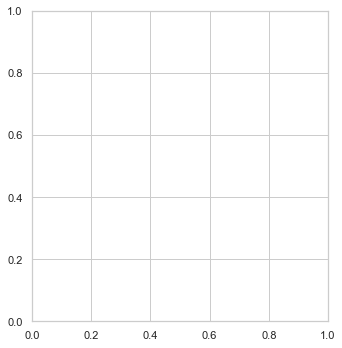

In [8]:
sns.set(rc={"figure.figsize": (18, 5)})
sns.set_style('whitegrid')

l = 1
c = 4
plt.subplot(l,c,1)

dados = df_todos.loc[(df_todos['periodo_aluno'].isnull()) , ['grupo_forma_saida', 'periodo_aluno']]
if dados.empty:
    print('\nNão há período_aluno nulo')
else:
    plt.ax = sns.countplot(data=dados, x='grupo_forma_saida', hue='grupo_forma_saida')
    plt.title('Período do Aluno', fontdict={'fontsize':16})
    plt.legend().remove()
    plt.subplot(l,c,2)
    
dados = df_todos.loc[(df_todos['sexo'].isnull()) , ['grupo_forma_saida', 'sexo']]
if dados.empty:
    print('\nNão há sexo nulo')
else:
    plt.ax = sns.countplot(data=dados, x='grupo_forma_saida', hue='grupo_forma_saida')
    plt.title('Sexo', fontdict={'fontsize':16})
    plt.legend().remove()
    plt.subplot(l,c,3)

dados = df_todos.loc[(df_todos['etnia'].isnull()) , ['grupo_forma_saida', 'etnia']]
if dados.empty:
    print('\nNão há etnia nulo')
else:    
    plt.ax = sns.countplot(data=dados, x='grupo_forma_saida', hue='grupo_forma_saida')
    plt.title('Etnia', fontdict={'fontsize':16})
    plt.legend().remove()
    plt.subplot(l,c,4)
    
dados = df_todos.loc[(df_todos['estado_civil'].isnull()) , ['grupo_forma_saida', 'estado_civil']]
if dados.empty:
    print('\nNão há estado_civil nulo')
else:
    plt.ax = sns.countplot(data=dados, x='grupo_forma_saida', hue='grupo_forma_saida')
    plt.title('Estado Civil', fontdict={'fontsize':16})
    plt.legend().remove()

plt.tight_layout()


<br>

## Imputação de dados <u>categóricos</u> ausentes

Por ter poucos dados ausentes categóricos, optamos por preenche-los com o registro mais frequente

In [9]:
#Preenche dados categóricos ausentes com os mais frequentes
values = df_todos[['periodo_aluno', 'estado_civil', 'etnia', 'sexo']]
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df_todos[['periodo_aluno', 'estado_civil', 'etnia', 'sexo']] = imputer.fit_transform(values)

#### Período Aluno

In [10]:
#Verificar quantidades de alunos em cada período e em cada classe
df_todos.groupby(['periodo_aluno', 'grupo_forma_saida']).count()['sexo'].unstack()

grupo_forma_saida,ATIVO,EVASÃO,FORMATURA
periodo_aluno,,,
1,2.0,26.0,NaN
10,NaN,NaN,21.0
2,5.0,8.0,NaN
3,2.0,6.0,NaN
4,4.0,2.0,NaN
5,4.0,2.0,NaN
6,3.0,2.0,NaN
7,NaN,2.0,NaN
8,3.0,1.0,6.0


**Período 0 é incoerente**. <br>
Se houver devemos alterar para o 1º período.

<AxesSubplot:>

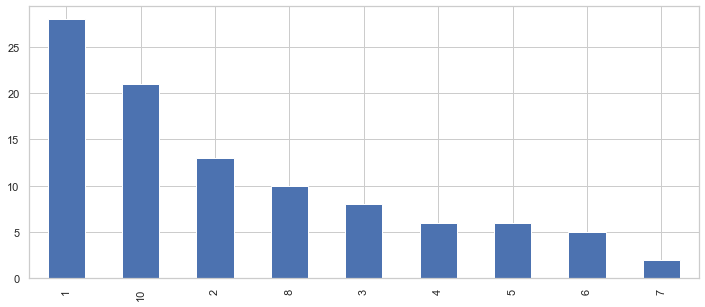

In [11]:
Filtro = (df_todos['periodo_aluno'] == '0')
df_todos.loc[Filtro, 'periodo_aluno'] = '1'
df_todos['periodo_aluno'].value_counts().sort_values(ascending=False).plot(kind='bar', figsize=(12,5))

<br>

## Imputação de dados <u>numéricos</u> ausentes


#### Verificando Score Nulos

<AxesSubplot:xlabel='grupo_forma_saida'>

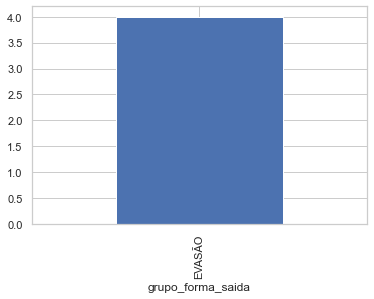

In [12]:
df_todos.loc[(df_todos['score'].isnull()) , ['grupo_forma_saida', 'curso']].groupby('grupo_forma_saida').count().plot(kind='bar', legend=False, figsize=(6,4))

**Scores** nulos de alunos **formados** setaremos para o mínimo, **5**. <br>
 Para os **demais** setaremos para **zero**.

In [13]:
df_todos.loc[(df_todos['grupo_forma_saida'] == 'FORMATURA') & (df_todos['score'].isnull()), ['score']] = 5
df_todos.fillna({'score': 0}, inplace=True)

#Verificando scores null
print(df_todos['score'].isnull().sum(), " scores nulos")

0  scores nulos


#### Verificando Percentual Cumprido Nulos

In [14]:
dados = df_todos.loc[(df_todos['percentual_cumprido'].isnull()) , ['grupo_forma_saida', 'curso']].groupby('grupo_forma_saida').count() 
if dados.empty:
    print('\nNão há percentual_cumprido nulo\n')
else:
    dados.plot(kind='bar', legend=False, figsize=(6,4))


Não há percentual_cumprido nulo



Os **Percentuais Cumpridos** nulos serão preenchidos com a mediana de cada grupo de dados ausentes considerando a **Forma de Saída** e o **Perído do Aluno**.   <br>
Por exemplo, se <u>um aluno evadido</u> do <u>8º período</u> não ter o percentual cumprido, a mediana de <u>todos evadidos</u> do <u>8ª periodo</u> será utilizada para preencher do dado ausente.
<br>

##### Grupos onde tem dados nulos considerando a Forma de Saída e o Período do Aluno

In [15]:
grupos_nulos = df_todos.loc[(df_todos['percentual_cumprido'].isnull()), ['grupo_forma_saida', 'periodo_aluno']] \
    .groupby(['grupo_forma_saida', 'periodo_aluno']).count().reset_index()

if grupos_nulos.empty:
    print('\nNão há grupos nulos\n')
else:
    grupos_nulos    


Não há grupos nulos



#### Imputando valores nulos

In [16]:
#Imputar valores
for i in range(len(grupos_nulos)):
    saida = grupos_nulos.loc[i, 'grupo_forma_saida']
    periodo = grupos_nulos.loc[i, 'periodo_aluno']
    filtro = (df_todos['grupo_forma_saida'] == saida) & (df_todos['periodo_aluno'] == periodo)
    valores = df_todos.loc[filtro, ['percentual_cumprido']]
    
    imputer = SimpleImputer(missing_values=np.nan, strategy='median')
    df_todos.loc[filtro, ['percentual_cumprido']] = imputer.fit_transform(valores)
    
#Verificando percentual_cumprido null
print("Resultado: ", df_todos['percentual_cumprido'].isnull().sum(), "percentual cumprido nulo")

Resultado:  0 percentual cumprido nulo


#### Verificando se ainda há dados nulos

In [17]:
df_todos.isnull().sum().sort_values(ascending=False)

ano_saida                          23
sexo                                0
periodo_aluno                       0
grupo_forma_saida                   0
funcionamento_curso                 0
curso                               0
ano_ingresso                        0
score                               0
tipo_retencao                       0
quant_trancamentos                  0
percentual_cumprido                 0
noturno                             0
estado_civil                        0
vespertino                          0
matutino                            0
grupo_forma_ingresso                0
tempo_que_concluiu_ensino_medio     0
mora_campus_onde_estuda             0
idade_na_saida                      0
deficiencia                         0
etnia                               0
cotista                             0
tempo_no_curso_semestre             0
dtype: int64

<br>

Ano de Saída nulos representam alunos ativos, aqueles que ainda não tem uma saída.

### Verificar se há registros com valor zero indevido

In [18]:
df_todos.isin([0]).sum().sort_values(ascending=False)

quant_trancamentos                 72
percentual_cumprido                13
score                               7
idade_na_saida                      3
sexo                                0
periodo_aluno                       0
grupo_forma_saida                   0
funcionamento_curso                 0
curso                               0
ano_saida                           0
ano_ingresso                        0
tipo_retencao                       0
noturno                             0
estado_civil                        0
vespertino                          0
matutino                            0
grupo_forma_ingresso                0
tempo_que_concluiu_ensino_medio     0
mora_campus_onde_estuda             0
deficiencia                         0
etnia                               0
cotista                             0
tempo_no_curso_semestre             0
dtype: int64

<br>

### Idade na Saída não deve ser zero

A estratégia de imputação para idades com valores zero será a **média** de cada tipo de forma de saída.

In [19]:
#Grupos onde tem dados com valor zero, considerando grupo_forma_saida
grupos_nulos = df_todos.loc[(df_todos['idade_na_saida'].isin([0])), ['grupo_forma_saida']] \
    .groupby(['grupo_forma_saida']).count().reset_index()

if grupos_nulos.empty:
    print('\nNão grupos nulos')
else:
    grupos_nulos

#### Imputando valores nulos

In [20]:
#Imputar valores
for i in range(len(grupos_nulos)):
    saida = grupos_nulos.loc[i, 'grupo_forma_saida']
    filtro = (df_todos['grupo_forma_saida'] == saida)
    valores = df_todos.loc[filtro, ['idade_na_saida']]
    
    imputer = SimpleImputer(missing_values=0, strategy='mean')
    df_todos.loc[filtro, ['idade_na_saida']] = np.around(imputer.fit_transform(valores), 0)

#Verificando percentual_cumprido null
print("Resultado: ", df_todos['idade_na_saida'].isin([0]).sum(), "Idade na Saída nulo")

Resultado:  0 Idade na Saída nulo


#### Verificando distribuição da Idade na Saída

<AxesSubplot:ylabel='Frequency'>

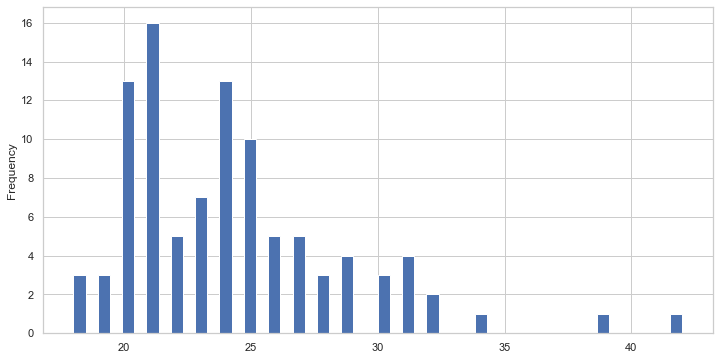

In [21]:
df_todos['idade_na_saida'].plot(kind='hist', figsize=(12,6), bins=50)

<br>

# <font color='#457B9D'><strong>Análise Exploratória</strong></font><a class="anchor" id="1"></a> [$\;\;\;\;\;\Uparrow$](#topo)
___

Verificando necessidade de **agrupamentos**, **compartimentação** e **correções**.

<br>

#### Visualizando os Dados Categóricos





                                                   DISTRIBUIÇÃO DAS VARIÁVEIS DO TIPO CATEGÓRICAS




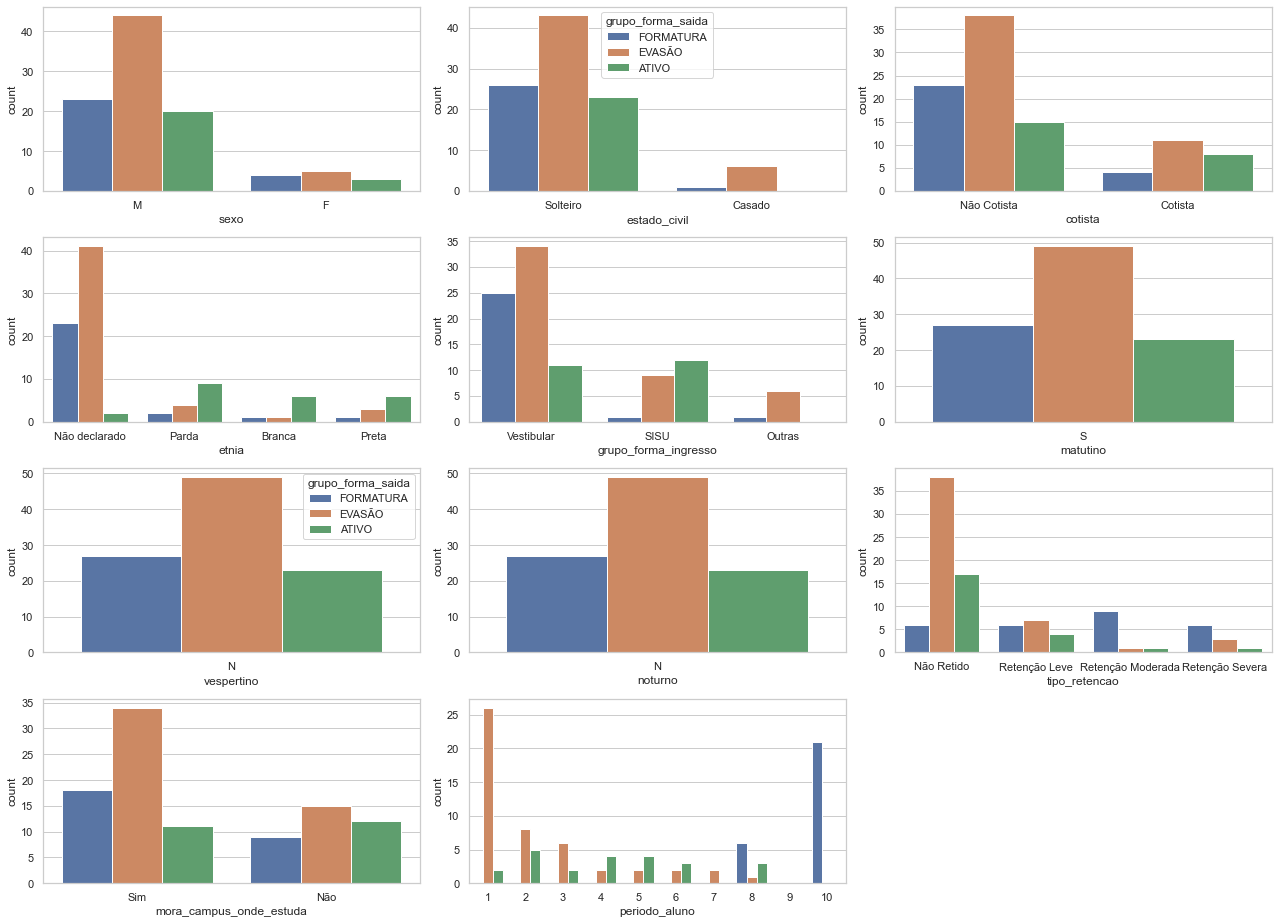

In [22]:
sns.set(rc={"figure.figsize": (18, 13)})
sns.set_style('whitegrid')

dados = df_todos

l = 4
c = 3
plt.subplot(l,c,1)
plt.ax = sns.countplot(data=dados, x='sexo', hue='grupo_forma_saida')
plt.legend().remove()
plt.subplot(l,c,2)
plt.ax = sns.countplot(data=dados, x="estado_civil", hue='grupo_forma_saida')
plt.subplot(l,c,3)
plt.ax = sns.countplot(data=dados, x="cotista", hue='grupo_forma_saida')
plt.legend().remove()
plt.subplot(l,c,4)
plt.ax = sns.countplot(data=dados, x="etnia", hue='grupo_forma_saida')
plt.legend().remove()
plt.subplot(l,c,5)
plt.ax = sns.countplot(data=dados, x="grupo_forma_ingresso", hue='grupo_forma_saida', order=['Vestibular', 'SISU', 'Outras'])
plt.legend().remove()
plt.subplot(l,c,6)
plt.ax = sns.countplot(data=dados, x="matutino", hue='grupo_forma_saida')
plt.legend().remove()
plt.subplot(l,c,7)
plt.ax = sns.countplot(data=dados, x="vespertino", hue='grupo_forma_saida')
plt.subplot(l,c,8)
plt.ax = sns.countplot(data=dados, x="noturno", hue='grupo_forma_saida')
plt.legend().remove()
plt.subplot(l,c,9)
plt.ax = sns.countplot(data=dados, x="tipo_retencao", hue='grupo_forma_saida', order=['Não Retido', 'Retenção Leve', 'Retenção Moderada', 'Retenção Severa'])
plt.legend().remove()
plt.subplot(l,c,10)
plt.ax = sns.countplot(data=dados, x="mora_campus_onde_estuda", hue='grupo_forma_saida')
plt.legend().remove()
plt.subplot(l,c,11)
plt.ax = sns.countplot(data=dados, x="periodo_aluno", hue='grupo_forma_saida', order=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
plt.legend().remove()

plt.tight_layout()

print('\n')
print('\n')
print(' ' * 50, 'DISTRIBUIÇÃO DAS VARIÁVEIS DO TIPO CATEGÓRICAS')
print('\n')

<br>

#### Visualizando os Dados Numéricos





                                                   DISTRIBUIÇÃO DAS VARIÁVEIS DE TIPOS NUMÉRICAS




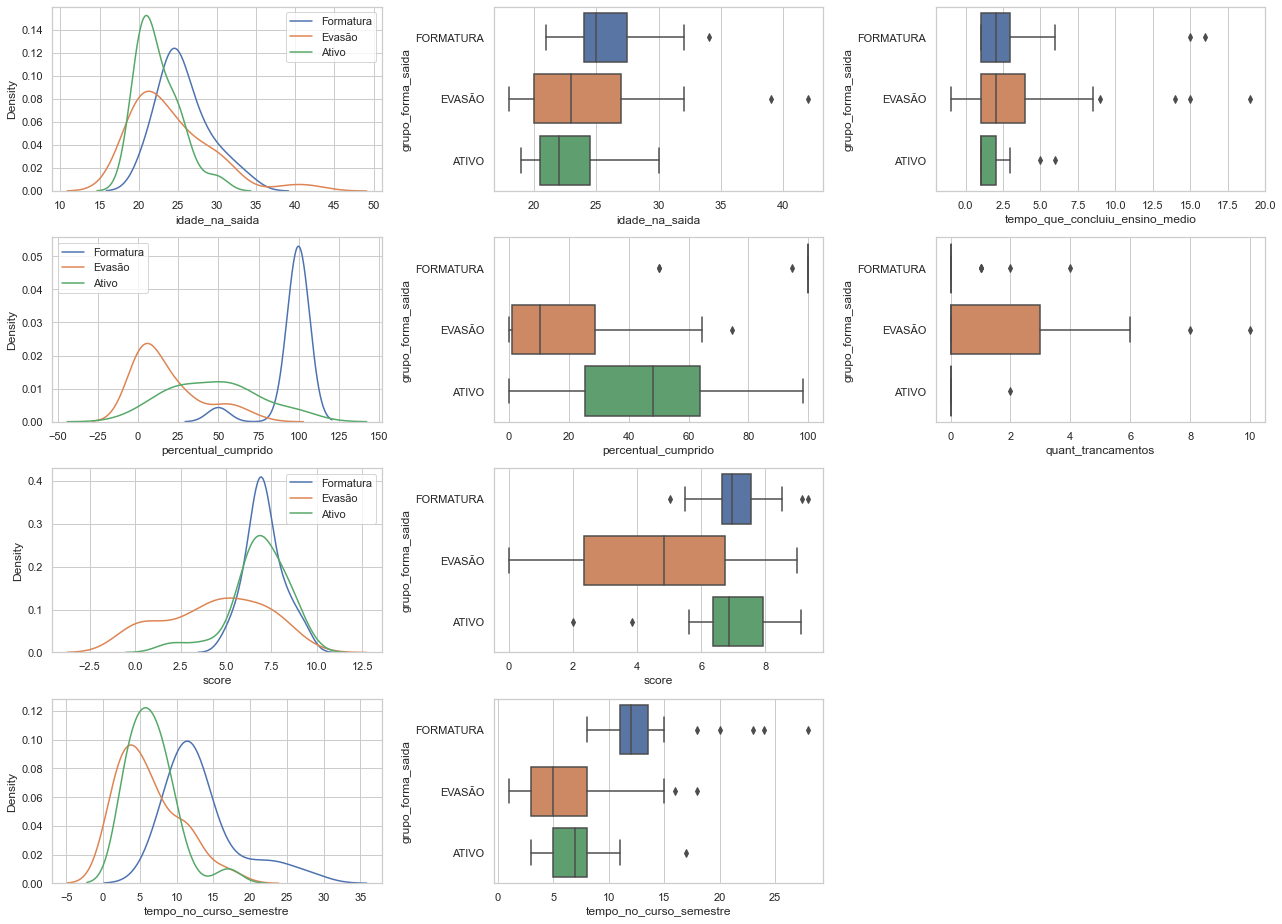

In [23]:
sns.set(rc={"figure.figsize": (18, 13)})

#df_todos.loc[df_todos['ano_saida'] == 2018, :]
sns.set_style('whitegrid')

l=4
c=3
plt.subplot(l,c,1)
plt.ax = sns.kdeplot(data=df_todos.loc[df_todos['grupo_forma_saida'] == 'FORMATURA', :], x='idade_na_saida', label = 'Formatura')
plt.ax = sns.kdeplot(data=df_todos.loc[df_todos['grupo_forma_saida'] == 'EVASÃO', :], x='idade_na_saida', label = 'Evasão')
plt.ax = sns.kdeplot(data=df_todos.loc[df_todos['grupo_forma_saida'] == 'ATIVO', :], x='idade_na_saida', label = 'Ativo')
plt.legend()
plt.subplot(l,c,2)
plt.ax = sns.boxplot(data=df_todos, y="grupo_forma_saida", x="idade_na_saida", orient='h')

plt.subplot(l,c,3)
plt.ax = sns.boxplot(data=df_todos, y="grupo_forma_saida", x="tempo_que_concluiu_ensino_medio", orient='h')

plt.subplot(l,c,4)
plt.ax = sns.kdeplot(data=df_todos.loc[df_todos['grupo_forma_saida'] == 'FORMATURA', :], x='percentual_cumprido', label = 'Formatura')
plt.ax = sns.kdeplot(data=df_todos.loc[df_todos['grupo_forma_saida'] == 'EVASÃO', :], x='percentual_cumprido', label = 'Evasão')
plt.ax = sns.kdeplot(data=df_todos.loc[df_todos['grupo_forma_saida'] == 'ATIVO', :], x='percentual_cumprido', label = 'Ativo')
plt.legend()
plt.subplot(l,c,5)
plt.ax = sns.boxplot(data=df_todos, y="grupo_forma_saida", x="percentual_cumprido", orient='h')

plt.subplot(l,c,6)
plt.ax = sns.boxplot(data=df_todos, y="grupo_forma_saida", x="quant_trancamentos", orient='h')

plt.subplot(l,c,7)
plt.ax = sns.kdeplot(data=df_todos.loc[df_todos['grupo_forma_saida'] == 'FORMATURA', :], x='score', label = 'Formatura')
plt.ax = sns.kdeplot(data=df_todos.loc[df_todos['grupo_forma_saida'] == 'EVASÃO', :], x='score', label = 'Evasão')
plt.ax = sns.kdeplot(data=df_todos.loc[df_todos['grupo_forma_saida'] == 'ATIVO', :], x='score', label = 'Ativo')
plt.legend()
plt.subplot(l,c,8)
plt.ax = sns.boxplot(data=df_todos, y="grupo_forma_saida", x="score", orient='h')

plt.subplot(l,c,10)
plt.ax = sns.kdeplot(data=df_todos.loc[df_todos['grupo_forma_saida'] == 'FORMATURA', :], x='tempo_no_curso_semestre', label = 'Formatura')
plt.ax = sns.kdeplot(data=df_todos.loc[df_todos['grupo_forma_saida'] == 'EVASÃO', :], x='tempo_no_curso_semestre', label = 'Evasão')
plt.ax = sns.kdeplot(data=df_todos.loc[df_todos['grupo_forma_saida'] == 'ATIVO', :], x='tempo_no_curso_semestre', label = 'Ativo')
plt.subplot(l,c,11)
plt.ax = sns.boxplot(data=df_todos, y="grupo_forma_saida", x="tempo_no_curso_semestre", orient='h')


plt.tight_layout()

print('\n')
print('\n')
print(' ' * 50, 'DISTRIBUIÇÃO DAS VARIÁVEIS DE TIPOS NUMÉRICAS')
print('\n')

<br>

## <u>Correção de Dados</u>

Observamos a necessidade de correções no Score.

### Score

Os outliers observados na classe FORMATURA representam valores incoerentes quando menores que 5.

In [24]:
## Corrigindos valores incoerentes de scores
df_todos.loc[(df_todos['grupo_forma_saida'] == 'FORMATURA') & (df_todos['score'] < 5), 'score'] = 5

##### Verificando correções

<AxesSubplot:xlabel='grupo_forma_saida', ylabel='score'>

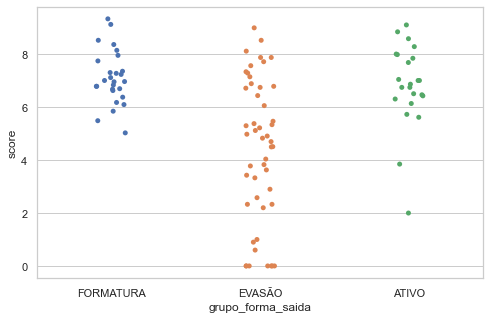

In [25]:
sns.set_style('whitegrid')
plt.subplots(figsize=(8,5))
sns.stripplot(x="grupo_forma_saida", y="score", data=df_todos, jitter=True)

<br>

## <u>Agrupamento de Dados</u>

Agrupar valores com pouca representatividade.

### Estado Civil

Uniremos os atributos Divorciado, União Estável e Viúvo

In [26]:
#Verificar quantidades
df_todos['estado_civil'].value_counts()

Solteiro    92
Casado       7
Name: estado_civil, dtype: int64

##### Após agrupamento

<AxesSubplot:>

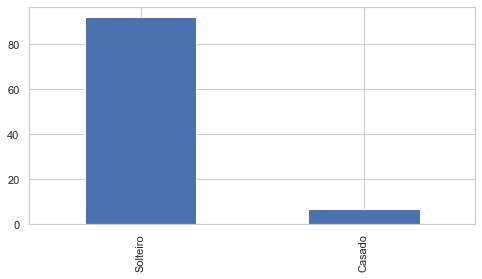

In [27]:
#Agrupar
Filtro = (df_todos['estado_civil'] == 'Divorciado') | \
         (df_todos['estado_civil'] == 'União Estável') | \
         (df_todos['estado_civil'] == 'Viúvo')
df_todos.loc[Filtro, 'estado_civil']  = 'Outros'
df_todos['estado_civil'].value_counts().plot(kind='bar', figsize=(8,4))

### Forma de Ingresso

Forma de Ingresso 'Seleção' é igual a 'Vesbibular'. 

In [28]:
#Verificar quantidades
df_todos['grupo_forma_ingresso'].value_counts()

Vestibular    70
SISU          22
Outras         7
Name: grupo_forma_ingresso, dtype: int64




##### Após agrupamento

<AxesSubplot:>

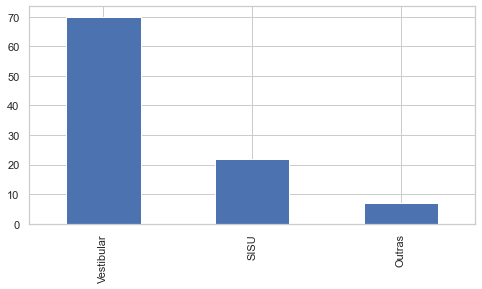

In [29]:
#Agrupar
df_todos.loc[df_todos['grupo_forma_ingresso'] == 'Seleção', 'grupo_forma_ingresso'] = 'Vestibular'
df_todos['grupo_forma_ingresso'].value_counts().plot(kind='bar', figsize=(8,4))

### Etnia

Uniremos os atributos Amarela e Indigena

In [30]:
#Verificar quantidades
df_todos['etnia'].value_counts()

Não declarado    66
Parda            15
Preta            10
Branca            8
Name: etnia, dtype: int64

<br>

##### Após agrupamento

<AxesSubplot:>

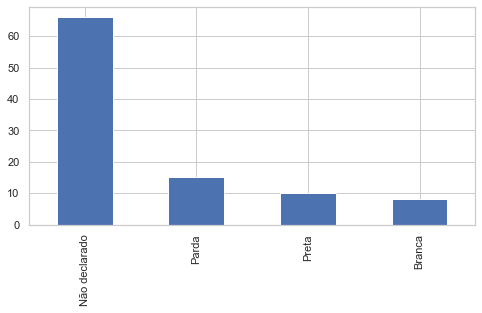

In [31]:
#Agrupar
Filtro = (df_todos['etnia'] == 'Amarela') | \
         (df_todos['etnia'] == 'Indigena')
df_todos.loc[Filtro, 'etnia'] = 'Outras'
df_todos['etnia'].value_counts().plot(kind='bar', figsize=(8,4))

<br>

## <u>Compartimentação de Dados</u>

Converter valores discretos em categóricos.


### Idade na Saída


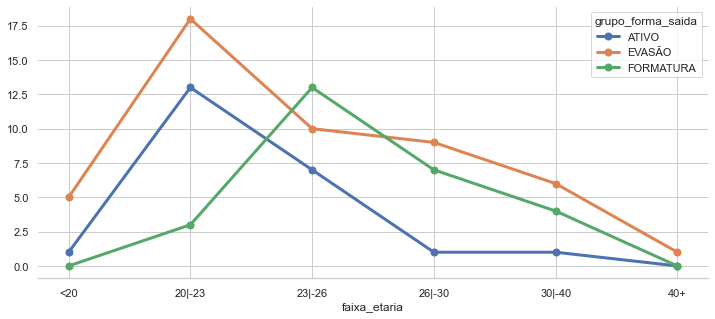

In [32]:
# Compartimentar
inter = [0, 20, 23, 26, 30, 40, np.inf]
rotulo = ['<20', '20|-23', '23|-26', '26|-30', '30|-40', '40+']
df_todos['faixa_etaria'] = pd.cut(x = df_todos['idade_na_saida'],
                         bins = inter,
                         labels = rotulo,
                         right = False,
                         include_lowest = True
                        )
df_todos.groupby(by=['faixa_etaria', 'grupo_forma_saida']).count()['sexo'].unstack().plot(lw=3, marker='o', ms=7, figsize=(12,5))
sns.despine(left=True)
#df_todos.groupby(by=['idade_na_saida', 'faixa_etaria']).count()['sexo'].unstack()

### Tempo que concluiu ensino médio

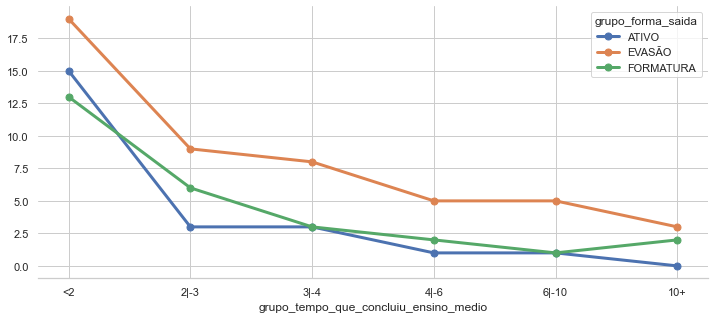

In [33]:
# Compartimentar
inter = [-1, 2, 3, 4, 6, 10, np.inf]
rotulo = ['<2', '2|-3', '3|-4', '4|-6', '6|-10', '10+']
df_todos['grupo_tempo_que_concluiu_ensino_medio'] = pd.cut(x = df_todos['tempo_que_concluiu_ensino_medio'],
                         bins = inter,
                         labels = rotulo,
                         right = False,
                         include_lowest = True
                        )
df_todos.groupby(by=['grupo_tempo_que_concluiu_ensino_medio', 'grupo_forma_saida']).count()['sexo'].unstack().plot(lw=3, marker='o', ms=7, figsize=(12,5))
sns.despine(left=True)
#df_todos.groupby(by=['tempo_que_concluiu_ensino_medio', 'grupo_tempo_que_concluiu_ensino_medio']).count()['sexo'].unstack().head(50)

### Percentual Cumprido do Curso

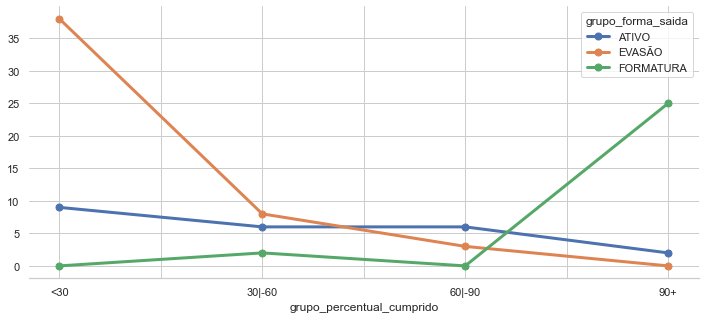

In [34]:
# Compartimentar
inter = [0, 30, 60, 90, np.inf]
rotulo = ['<30', '30|-60', '60|-90', '90+']
df_todos['grupo_percentual_cumprido'] = pd.cut(x = df_todos['percentual_cumprido'],
                         bins = inter,
                         labels = rotulo,
                         right = False,
                         include_lowest = True
                        )
df_todos.groupby(by=['grupo_percentual_cumprido', 'grupo_forma_saida']).count()['sexo'].unstack().plot(lw=3, marker='o', ms=7, figsize=(12,5))
sns.despine(left=True)
#df_todos.groupby(by=['percentual_cumprido', 'grupo_percentual_cumprido']).count()['sexo'].unstack().head(60)

### Quantidade de Trancamentos

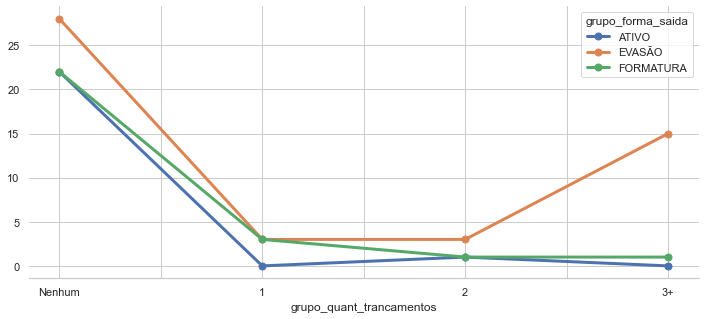

In [35]:
# Compartimentar
inter = [0, 1, 2, 3, np.inf]
rotulo = ['Nenhum', '1', '2', '3+']
df_todos['grupo_quant_trancamentos'] = pd.cut(x = df_todos['quant_trancamentos'],
                         bins = inter,
                         labels = rotulo,
                         right = False,
                         include_lowest = True
                        )
df_todos.groupby(by=['grupo_quant_trancamentos', 'grupo_forma_saida']).count()['sexo'].unstack().plot(lw=3, marker='o', ms=7, figsize=(12,5))
sns.despine(left=True)
#df_todos.groupby(by=['quant_trancamentos', 'grupo_quant_trancamentos']).count()['sexo'].unstack().head(60)

### Score

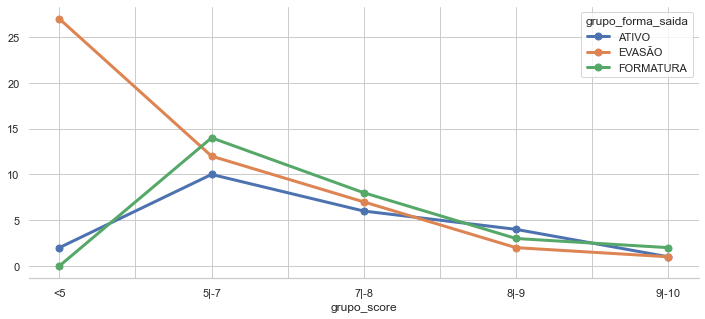

In [36]:
# Compartimentar
inter = [0, 5, 7, 8, 9, np.inf]
rotulo = ['<5', '5|-7', '7|-8', '8|-9', '9|-10']
df_todos['grupo_score'] = pd.cut(x = df_todos['score'],
                         bins = inter,
                         labels = rotulo,
                         right = False,
                         include_lowest = True
                        )
df_todos.groupby(by=['grupo_score', 'grupo_forma_saida']).count()['sexo'].unstack().plot(lw=3, marker='o', ms=7, figsize=(12,5))
sns.despine(left=True)
#df_todos.groupby(by=['score', 'grupo_score']).count()['sexo'].unstack().head(50)
#df_todos.grupo_score.value_counts()
#df_todos.groupby(by=['grupo_forma_saida', 'grupo_score']).count()['sexo'].unstack().head(50)

### Tempo no Curso

Juntar os semestres e anos

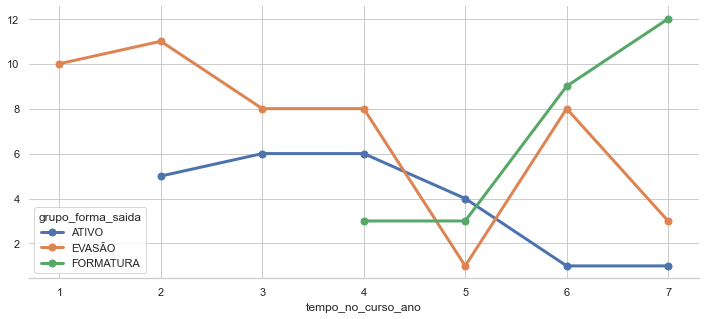

In [37]:
# Compartimentar
inter = [0, 3, 5, 7, 9, 11, 13, np.inf]
rotulo = [1, 2, 3, 4, 5, 6, 7]
df_todos['tempo_no_curso_ano'] = pd.cut(x = df_todos['tempo_no_curso_semestre'],
                         bins = inter,
                         labels = rotulo,
                         right = False,
                         include_lowest = True
                        ).astype('float')
df_todos.groupby(by=['tempo_no_curso_ano', 'grupo_forma_saida']).count()['sexo'].unstack().plot(lw=3, marker='o', ms=7, figsize=(12,5))
sns.despine(left=True)

#Verificar
#df_todos.groupby(by=['tempo_no_curso_semestre', 'tempo_no_curso_ano']).count()['sexo'].unstack().head(50)
#df_todos.tempo_no_curso_ano.value_counts().sort_index()
#df_todos.groupby(by=['grupo_forma_saida', 'tempo_no_curso_ano']).count()['sexo'].unstack().head(50)

<br> 

# <font color='#457B9D'><strong>ANÁLISE DA EVASÃO POR CURSO</strong></font><a class="anchor" id="2"></a>
---

### Lista de Cursos Disponíveis

Quantidade de alunos ativos por curso

In [38]:
curso_selecionado = ''
df_cursos = df_todos.query("grupo_forma_saida == 'ATIVO' and funcionamento_curso != 'Desativado'")
print('\n', df_cursos['curso'].nunique(), 'cursos\n')
df_cursos['curso'].value_counts().sort_index()


 1 cursos



COMPUTAÇÃO    23
Name: curso, dtype: int64

## <font color='#832034'><strong>SELECIONAR CURSO PARA ANÁLISE DA EVASÃO</strong></font>

In [39]:
#Informar curso selecionado para análise
curso_selecionado = 'COMPUTAÇÃO'

df_curso = df_todos[df_todos['curso'] == curso_selecionado]
has_curso_sel = (df_curso.shape[0] != 0)   #se houver algum curso válido selecionado, ele terá ao menos um aluno 

#Se nenhum curso for selecionado, retorna todos os cursos
if has_curso_sel:
    df_curso_sel = df_curso
else:
    df_curso_sel = df_todos

#Excluir colunas que foram tratadas
colunas_excluir = ['funcionamento_curso', 'idade_na_saida', 'tempo_que_concluiu_ensino_medio', 'quant_trancamentos', 'tempo_no_curso_semestre']
df_curso_sel = df_curso_sel.drop(colunas_excluir, axis=1)

#Converte as columas categóricas/string para o tipo "category"
col_str = df_curso_sel.select_dtypes(['object']).columns
for col_name in col_str:
    df_curso_sel[col_name]= df_curso_sel[col_name].astype('category')

### Quantidade de alunos do curso selecionado

In [40]:
print('\n')
print(curso_selecionado, ':', df_curso_sel.shape[0], 'alunos analisados')
print('\n')



COMPUTAÇÃO : 99 alunos analisados




### Quantidade de alunos em cada classe


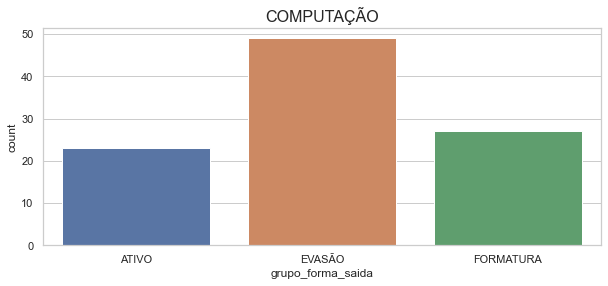

In [41]:
plt.figure(figsize=(10,4))
sns.countplot(data=df_curso_sel, x='grupo_forma_saida')
plt.title(curso_selecionado, fontdict={'fontsize':16})
print('\n')

<br>

## Análise do Comportamento da Evasão


### <u>Evasão Total</u>

Mostra a maneira como cada turna de alunos ingressantes tem-se comportado ao longo do tempo, desde 1999 até o 2019.

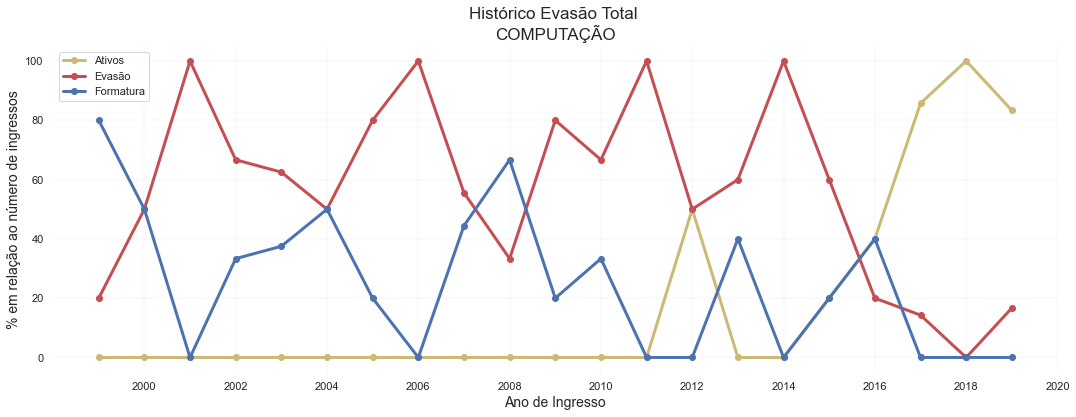

In [42]:
df_ev = df_curso_sel.groupby(by=['ano_ingresso', 'grupo_forma_saida']).count()['sexo'].unstack()
df_ev_tot = pd.DataFrame({})
df_ev_tot['pct_ativo'] = df_ev['ATIVO']/df_ev.sum(axis=1)*100
df_ev_tot['pct_evasao'] = df_ev['EVASÃO']/df_ev.sum(axis=1)*100
df_ev_tot['pct_formatura'] = df_ev['FORMATURA']/df_ev.sum(axis=1)*100


if has_curso_sel:
    msg = curso_selecionado
else:
    msg = 'Todos os Cursos'

fig, axes = plt.subplots(figsize=(18,6))
axes.plot(df_ev_tot['pct_ativo'], 'y', lw=3, linestyle='-', marker='o', label = 'Ativos')
axes.plot(df_ev_tot['pct_evasao'], 'r', lw=3, linestyle='-', marker='o', label = 'Evasão')
axes.plot(df_ev_tot['pct_formatura'], 'b', lw=3, linestyle='-', marker='o', label = 'Formatura')
axes.grid(color='grey', alpha=0.5, linestyle='dashed', linewidth=0.2)

axes.set_xlabel('Ano de Ingresso', fontdict={'fontsize': 14}) 
axes.set_ylabel('% em relação ao número de ingressos', fontdict={'fontsize': 14})
axes.set_title('Histórico Evasão Total \n' + msg, fontdict={'fontsize': 17})
#axes.set_xlim([1998.5, 2019.5])
plt.xticks(np.arange(2000, 2021, 2))

sns.despine(left=True, bottom=True) #Remove bordas
axes.legend()


<br>

### <u>Evasão Anual</u>

É representada pelo percentual do número de estudantes que saíram do curso em determinado ano em relação ao número de matrículas únicas no curso naquele mesmo ano.

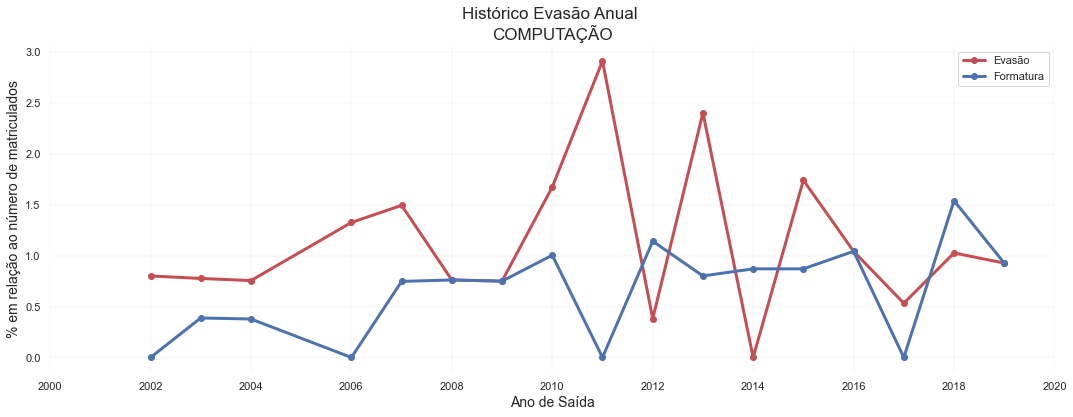

In [43]:
#Renomeia as célula do join para o mesmo nome da tabela principal
#df_quant_matriculados.rename(columns = {"ano": "ano_saida"}, inplace = True)
#df_matriculados = df_quant_matriculados.loc[df_quant_matriculados['curso'] == curso_selecionado, ['ano_saida', 'matriculados']]

filtro = (df_curso_sel['grupo_forma_saida'] != 'ATIVO')
df_ev_anual = df_curso_sel.loc[filtro, ['curso', 'ano_saida', 'grupo_forma_saida']]

#Grupo por Ano Saída e Forma de Saída
if has_curso_sel:
    df_ev_anual = df_ev_anual.groupby(by=['curso', 'ano_saida', 'grupo_forma_saida']).agg(quant_alunos=('grupo_forma_saida', 'count')).unstack()
    df_ev_anual = pd.merge(left=df_ev_anual, right=df_matriculados, how="left", on=['curso', 'ano_saida']).reset_index()
else:
    df_ev_anual = df_ev_anual.groupby(by=['ano_saida', 'grupo_forma_saida']).agg(quant_alunos=('grupo_forma_saida', 'count')).unstack()
    df_ev_anual = pd.merge(left=df_ev_anual, right=df_matriculados_ano, how="left", on=['ano_saida']).reset_index()

#calcula o percentual
df_ev_anual['pct_evasao'] = df_ev_anual['quant_alunos', 'EVASÃO'] / df_ev_anual['matriculados'] * 100
df_ev_anual['pct_formatura'] = df_ev_anual['quant_alunos', 'FORMATURA'] / df_ev_anual['matriculados'] * 100

df_ev_anual = df_ev_anual.loc[df_ev_anual['ano_saida'] <= 2019, ['ano_saida', 'pct_evasao', 'pct_formatura']]
df_ev_anual = df_ev_anual.set_index(['ano_saida'])

#Grafico
fig, axes = plt.subplots(figsize=(18,6))
axes.plot(df_ev_anual['pct_evasao'], 'r', lw=3, linestyle='-', marker='o', label = 'Evasão')
axes.plot(df_ev_anual['pct_formatura'], 'b', lw=3, linestyle='-', marker='o', label = 'Formatura')
axes.grid(color='grey', alpha=0.5, linestyle='dashed', linewidth=0.2) 

axes.set_xlabel('Ano de Saída', fontdict={'fontsize': 14}) 
axes.set_ylabel('% em relação ao número de matriculados', fontdict={'fontsize': 14})
axes.set_title('Histórico Evasão Anual \n' + msg, fontdict={'fontsize': 17})
#axes.set_xlim([1998.5, 2019.5])
plt.xticks(np.arange(2000, 2021, 2))

sns.despine(left=True, bottom=True) #Remove bordas
axes.legend()

## Análise Exploratória do Curso Selecionado



                                                                 COMPUTAÇÃO                                                                 




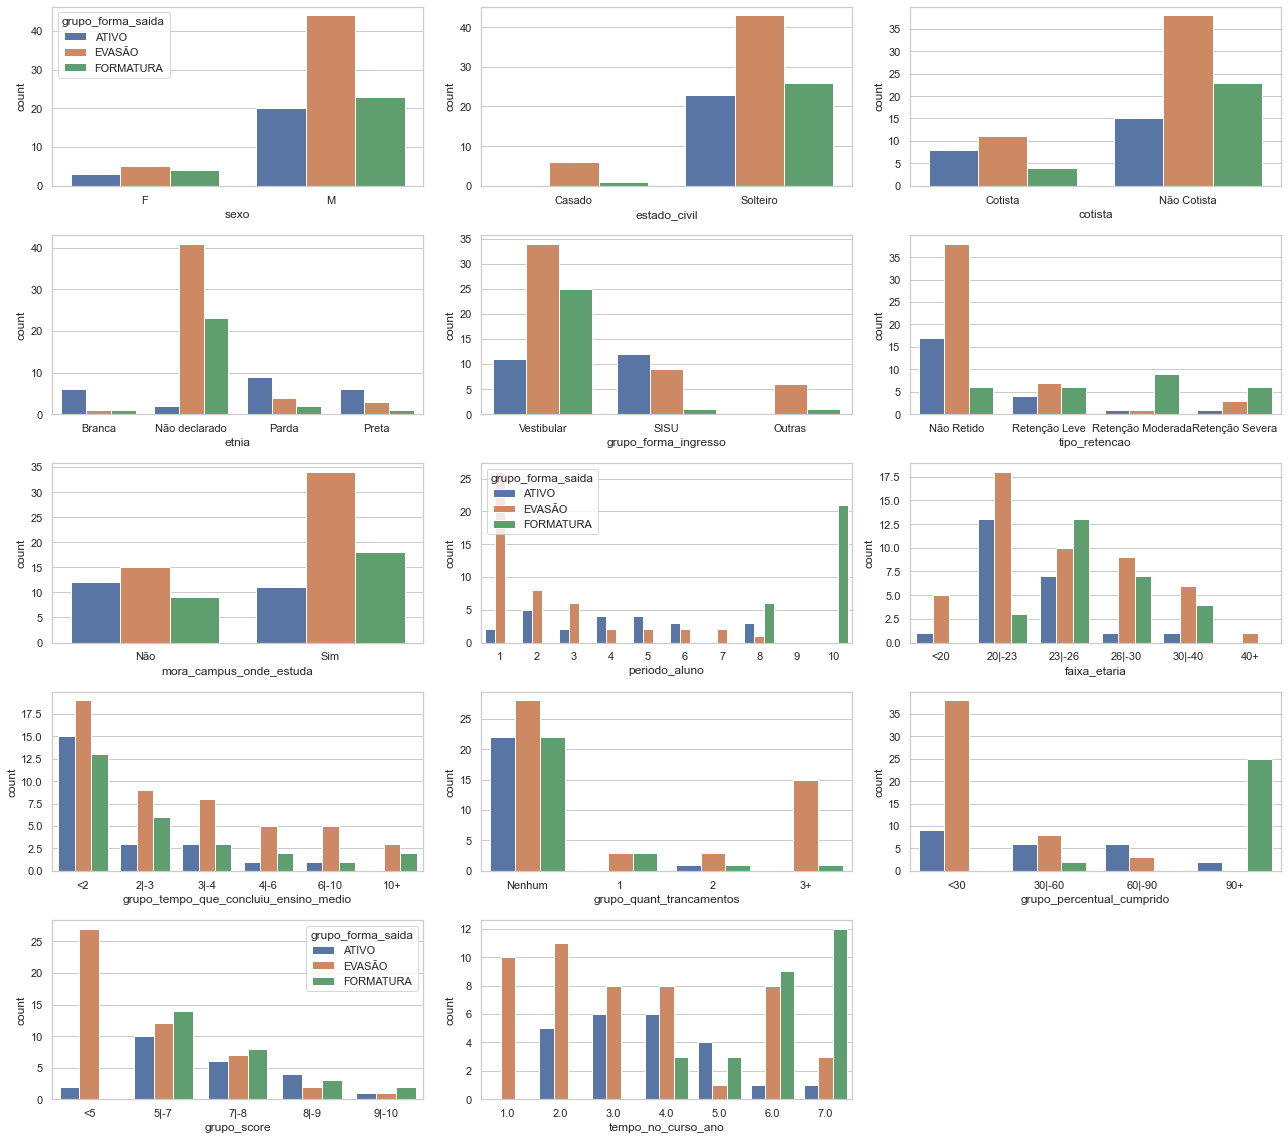

In [44]:
sns.set(rc={"figure.figsize": (18, 16)})
sns.set_style('whitegrid')

dados = df_curso_sel

l= 5
c= 3
#Dados Categóricos
plt.subplot(l,c,1)
plt.ax = sns.countplot(data=dados, x='sexo', hue='grupo_forma_saida')
plt.subplot(l,c,2)
plt.ax = sns.countplot(data=dados, x="estado_civil", hue='grupo_forma_saida')
plt.legend().remove()
plt.subplot(l,c,3)
plt.ax = sns.countplot(data=dados, x="cotista", hue='grupo_forma_saida')
plt.legend().remove()
plt.subplot(l,c,4)
plt.ax = sns.countplot(data=dados, x="etnia", hue='grupo_forma_saida')
plt.legend().remove()
plt.subplot(l,c,5)
plt.ax = sns.countplot(data=dados, x="grupo_forma_ingresso", hue='grupo_forma_saida', order=['Vestibular', 'SISU', 'Outras'])
plt.legend().remove()
plt.subplot(l,c,6)
plt.ax = sns.countplot(data=dados, x="tipo_retencao", hue='grupo_forma_saida', order=['Não Retido', 'Retenção Leve', 'Retenção Moderada', 'Retenção Severa'])
plt.legend().remove()
plt.subplot(l,c,7)
plt.ax = sns.countplot(data=dados, x="mora_campus_onde_estuda", hue='grupo_forma_saida')
plt.legend().remove()
plt.subplot(l,c,8)
plt.ax = sns.countplot(data=dados, x="periodo_aluno", hue='grupo_forma_saida', order=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
plt.subplot(l,c,9)
plt.ax = sns.countplot(data=dados, x="faixa_etaria", hue='grupo_forma_saida')
plt.legend().remove()
plt.subplot(l,c,10)
plt.ax = sns.countplot(data=dados, x="grupo_tempo_que_concluiu_ensino_medio", hue='grupo_forma_saida')
plt.legend().remove()
plt.subplot(l,c,11)
plt.ax = sns.countplot(data=dados, x="grupo_quant_trancamentos", hue='grupo_forma_saida')
plt.legend().remove()
plt.subplot(l,c,12)
plt.ax = sns.countplot(data=dados, x="grupo_percentual_cumprido", hue='grupo_forma_saida')
plt.legend().remove()
plt.subplot(l,c,13)
plt.ax = sns.countplot(data=dados, x="grupo_score", hue='grupo_forma_saida')
plt.subplot(l,c,14)
plt.ax = sns.countplot(data=dados, x="tempo_no_curso_ano", hue='grupo_forma_saida')
plt.legend().remove()

plt.tight_layout()

print('\n')
print(f'{curso_selecionado:^140}')
print('\n')

# <font color='#457B9D'><strong>Pré-processamento dos dados para Machine Learning</strong></font><a class="anchor" id="3"></a> [$\;\;\;\;\;\Uparrow$](#topo)
___
##### Verificando campos do dataset.

In [45]:
df_curso_sel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 20000000101010001 to 20000080100010104
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   sexo                                   99 non-null     category
 1   estado_civil                           99 non-null     category
 2   cotista                                99 non-null     category
 3   etnia                                  99 non-null     category
 4   deficiencia                            99 non-null     category
 5   mora_campus_onde_estuda                99 non-null     category
 6   grupo_forma_ingresso                   99 non-null     category
 7   matutino                               99 non-null     category
 8   vespertino                             99 non-null     category
 9   noturno                                99 non-null     category
 10  periodo_aluno                    

<br>

## Excluindo colunas desnecessárias

O **turno** não é importante para o modelo porque o curso analisado ocorre apenas em um turno.   
O **ano_ingresso** e **ano_saida** não são relevantes, serão substituidos por **tempo_no_curso_ano**. 

In [46]:
colunas_excluir = ['ano_saida', 'matutino', 'vespertino', 'noturno', 'grupo_percentual_cumprido', 'grupo_score', 'curso', 'ano_ingresso']
colunas = list(set(df_curso_sel.columns) - set(colunas_excluir))
df_modelo = df_curso_sel.loc[:, colunas].copy()

df_modelo.sample(5)

,mora_campus_onde_estuda,faixa_etaria,periodo_aluno,tempo_no_curso_ano,grupo_tempo_que_concluiu_ensino_medio,tipo_retencao,grupo_forma_ingresso,sexo,grupo_quant_trancamentos,percentual_cumprido,deficiencia,cotista,estado_civil,grupo_forma_saida,etnia,score
id_cript,,,,,,,,,,,,,,,,
20001050100090200,Sim,20|-23,1,2.0,<2,Não Retido,SISU,M,Nenhum,0.0,Não,Cotista,Solteiro,EVASÃO,Branca,0.00
20000090100090707,Sim,<20,1,1.0,<2,Não Retido,Vestibular,M,3+,0.0,Não,Cotista,Solteiro,EVASÃO,Não declarado,0.00
20001050100080708,Sim,26|-30,6,6.0,4|-6,Retenção Moderada,Vestibular,M,Nenhum,71.2,Não,Não Cotista,Solteiro,ATIVO,Branca,6.14
20000060104050505,Sim,26|-30,7,6.0,6|-10,Retenção Leve,Vestibular,M,3+,64.5,Não,Não Cotista,Solteiro,EVASÃO,Não declarado,7.88
20000000100040400,Sim,23|-26,10,6.0,3|-4,Retenção Leve,Vestibular,F,Nenhum,100.0,Não,Não Cotista,Solteiro,FORMATURA,Não declarado,7.24


#### Separando nomes das variáveis por tipo de dado

As variávais foram classificadas por tipo: **classe**, **contínuas** e **categóricas**. <br>
Facilita a manipulação de dados para criação de novos datasets

In [47]:
classe = ['grupo_forma_saida']
var_continuas = ['score', 'percentual_cumprido', 'tempo_no_curso_ano']
var_categoricas = list(set(df_modelo.columns) - set(classe) - set(var_continuas))

## Padronizar variáveis contínuas

Verificando escala das variáveis contínuas

In [48]:
df_modelo[var_continuas].describe()

,score,percentual_cumprido,tempo_no_curso_ano
count,99.000000,99.000000,99.000000
mean,5.697879,46.320202,4.161616
std,2.478485,38.692806,1.993393
min,0.000000,0.000000,1.000000
25%,4.605000,9.900000,2.000000
50%,6.510000,38.600000,4.000000
75%,7.300000,98.300000,6.000000
max,9.340000,100.000000,7.000000


Estão em escalas diferentes, é recomendado padronizar (escala entre 0 e 1).

In [49]:
#Padronizar entre 0 e 1
scaler = MinMaxScaler()
df_modelo[var_continuas] = scaler.fit_transform(df_modelo[var_continuas])

##### Verificando resultado da padronização

In [50]:
df_modelo[var_continuas].describe()

,score,percentual_cumprido,tempo_no_curso_ano
count,99.000000,99.000000,99.000000
mean,0.610051,0.463202,0.526936
std,0.265362,0.386928,0.332232
min,0.000000,0.000000,0.000000
25%,0.493041,0.099000,0.166667
50%,0.697002,0.386000,0.500000
75%,0.781585,0.983000,0.833333
max,1.000000,1.000000,1.000000


<br>

## <u>Criação de Datasets com formatos de dados diferentes</u>

Os formatos diferentes serão utilizados conforme o mais apropriado para cada modelo de aprendizado.


### Dataset com Variáveis Categóricas Codificadas (LabelEncoder)

Dataset com as variáveis categóricas codificadas e as contínuas padronizadas.   
Classe ainda não será codificada.

In [51]:
df_code = df_modelo.copy()

#LabelEncoder
le = preprocessing.LabelEncoder()

for col_name in var_categoricas:
    df_code[col_name] = le.fit_transform(df_code[col_name])
    
df_code.sample(5)

,mora_campus_onde_estuda,faixa_etaria,periodo_aluno,tempo_no_curso_ano,grupo_tempo_que_concluiu_ensino_medio,tipo_retencao,grupo_forma_ingresso,sexo,grupo_quant_trancamentos,percentual_cumprido,deficiencia,cotista,estado_civil,grupo_forma_saida,etnia,score
id_cript,,,,,,,,,,,,,,,,
20001090101090102,0,0,2,0.166667,1,0,1,1,3,0.253,0,1,1,ATIVO,0,0.919700
20001050101050405,1,3,0,0.166667,0,0,2,1,3,0.000,0,1,0,EVASÃO,2,0.249465
20000000100040507,1,1,3,0.500000,5,0,2,1,3,0.292,0,1,1,EVASÃO,1,0.780514
20000090100000702,1,0,3,0.500000,1,0,2,0,0,0.253,0,0,0,EVASÃO,1,0.482869
20001080100040108,1,1,3,0.333333,4,0,2,1,3,0.297,0,1,1,ATIVO,1,0.887580


<br>

### Dataset com Variáveis Categóricas Dummies (OneHotEncoder)

Prepara as variáveis categóricas para aplicação de modelos de aprendizado de máquina.   
Cria uma nova coluna com cada valor categórico e torna a coluna binária (0 ou 1).

In [52]:
df_dummy = pd.get_dummies(df_modelo, columns=var_categoricas, drop_first=True)
df_dummy.sample(5)

,tempo_no_curso_ano,percentual_cumprido,grupo_forma_saida,score,mora_campus_onde_estuda_Sim,faixa_etaria_20|-23,faixa_etaria_23|-26,faixa_etaria_26|-30,faixa_etaria_30|-40,faixa_etaria_40+,...,grupo_forma_ingresso_Vestibular,sexo_M,grupo_quant_trancamentos_1,grupo_quant_trancamentos_2,grupo_quant_trancamentos_3+,cotista_Não Cotista,estado_civil_Solteiro,etnia_Não declarado,etnia_Parda,etnia_Preta
id_cript,,,,,,,,,,,,,,,,,,,,,
20000020200050508,1.000000,1.000,FORMATURA,0.538544,1,0,0,0,1,0,...,0,1,0,0,0,1,1,1,0,0
20000000100020000,0.833333,0.288,EVASÃO,0.689507,1,0,0,0,0,1,...,0,1,0,0,0,1,0,1,0,0
20001060101060204,0.500000,1.000,FORMATURA,0.977516,1,1,0,0,0,0,...,0,1,0,0,0,1,1,0,1,0
20001070100050600,0.500000,0.584,ATIVO,0.692719,0,1,0,0,0,0,...,1,1,0,0,0,0,1,0,1,0
20000070101040901,0.000000,0.000,EVASÃO,0.235546,1,1,0,0,0,0,...,1,0,0,0,0,1,1,1,0,0


<br>

## Dividir dataset

Determinar o **X** e o **y**     
Separar alunos ATIVOS dos alunos FORMADOS E EVADIDOS.    
Teremos um dataset com variáveis dummies e outro com variáveis codificadas.

### Egressos com variáveis codificadas e dummies

In [53]:
#Xd e Xc -> d=dummies e  c=codificadas

#Dataset com variáveis dummies
var_dummy = list(set(df_dummy.columns) - set(classe))
Xd = df_dummy.loc[df_dummy[classe[0]] != 'ATIVO', var_dummy]
yd = df_dummy.loc[df_dummy[classe[0]] != 'ATIVO', classe].replace(['FORMATURA', 'EVASÃO'], [0, 1])

#Dataset sem dummies e com variáveis codificadas
Xc = df_code.loc[df_code[classe[0]] != 'ATIVO', var_categoricas + var_continuas]
yc = df_code.loc[df_code[classe[0]] != 'ATIVO', classe].replace(['FORMATURA', 'EVASÃO'], [0, 1])

print(Xd.shape[0], "alunos egressos")

76 alunos egressos


### Alunos ativos para previsão da evasão

A relação de alunos ativos propensos a evadir será encaminhada aos colegiados para providências quanto a tentativas de reversão da possível situação de evasão do aluno.   
São dos dados não rotulados.   
Teremos também um dataset com variáveis dummies e outro com variáveis codificadas.

In [54]:
#Dataset com variáveis dummies
Xd_ativos = df_dummy.loc[df_dummy[classe[0]] == 'ATIVO', var_dummy]
#Dataset sem dummies e com variáveis codificadas
Xc_ativos = df_code.loc[df_code[classe[0]] == 'ATIVO', var_categoricas + var_continuas]

print(Xd_ativos.shape[0], "alunos ativos")

23 alunos ativos


### Divisão de Dados para Treino e Testes

Os dois datasets de **alunos egressos** são divididos, o com variáveis dummies e o com variáveis codificadas

In [55]:
#Dataset dividido com variáveis dummies
Xd_treino, Xd_teste, yd_treino, yd_teste = train_test_split(Xd, yd, test_size = 0.2, random_state = 17)
#Dataset dividido sem dummies e com variáveis codificadas
Xc_treino, Xc_teste, yc_treino, yc_teste = train_test_split(Xc, yc, test_size = 0.2, random_state = 17)

print('\n')
print("", Xd_treino.shape[0], "alunos para treino.\n", Xd_teste.shape[0], "alunos para testes")



 60 alunos para treino.
 16 alunos para testes


<br>

# <font color='#457B9D'><strong>Aplicação de Modelos de Aprendizado de Máquina</strong></font><a class="anchor" id="4"></a> [$\;\;\;\;\;\Uparrow$](#topo)

---
## KNN

Para este modelo usaremos o dataset com variáveis **dummies**, pois de adequa melhor.

#### Buscando o Melhor K

Text(0, 0.5, 'Erro Médio')

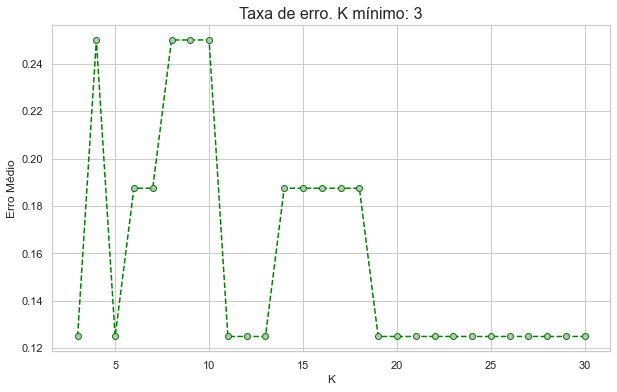

In [56]:
error_rate = []
num_tentativas = 30
kInicio = 3
for i in range(kInicio, num_tentativas + 1):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(Xd_treino, yd_treino.values.ravel())
    y_pred_i = knn.predict(Xd_teste)
    error_rate.append(np.mean(y_pred_i != yd_teste.values.ravel()))
Kminimo = np.argmin(error_rate) + kInicio

#plotar erros
plt.figure(figsize=(10,6))
plt.plot(range(kInicio, num_tentativas + 1), error_rate, color='green', linestyle='dashed', marker='o', markerfacecolor='silver', markersize=6)
plt.title('Taxa de erro. K mínimo: ' + str(Kminimo), fontdict={'fontsize': 16})
plt.xlabel('K')
plt.ylabel('Erro Médio')


#### Treina o modelo com o melhor K 


In [57]:
k_value = Kminimo
knn = KNeighborsClassifier(n_neighbors = k_value)
knn.fit(Xd_treino, yd_treino.values.ravel())
#Predição
y_pred_knn = knn.predict(Xd_teste)
y_pred_knn_prob = knn.predict_proba(Xd_teste)[:, 1]

#### Avaliação do KNN

##### Matriz de confusão

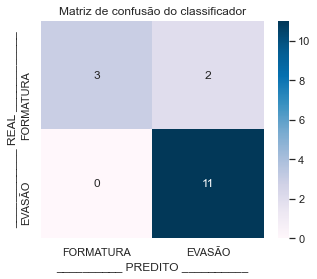

In [58]:
cm = confusion_matrix(yd_teste, y_pred_knn)
df_cm = pd.DataFrame(cm, index = ['FORMATURA', 'EVASÃO'], columns = ['FORMATURA', 'EVASÃO'])

plt.figure(figsize=(5,4))
sns.heatmap(df_cm, cmap='PuBu', annot=True, fmt="d")
plt.title('Matriz de confusão do classificador')
plt.xlabel('__________ PREDITO __________')
plt.ylabel('____________ REAL ____________')
print('\n')

##### Métricas

In [59]:
print(classification_report(yd_teste, y_pred_knn, target_names=['FORMATURA', 'EVASÃO']))

              precision    recall  f1-score   support

   FORMATURA       1.00      0.60      0.75         5
      EVASÃO       0.85      1.00      0.92        11

    accuracy                           0.88        16
   macro avg       0.92      0.80      0.83        16
weighted avg       0.89      0.88      0.86        16



---

## Decision Tree

Começaremos apenas treinando uma única árvore de decisão.   
Usaremos do dataset **sem dummies** e com variáveis codificadas.

In [60]:
dtree = DecisionTreeClassifier(criterion="entropy", random_state=17, max_depth=10)
dtree.fit(Xc_treino, yc_treino)

y_pred_dtree = dtree.predict(Xc_teste)
y_pred_dtree_prob = dtree.predict_proba(Xc_teste)[:, 1]

#### Avaliação da Árvore

##### Matriz de confusão

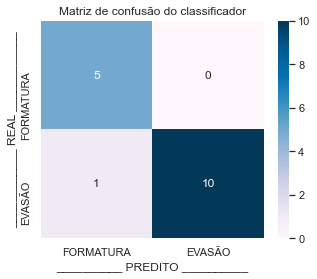

In [61]:
cm = confusion_matrix(yc_teste, y_pred_dtree)
df_cm = pd.DataFrame(cm, index = ['FORMATURA', 'EVASÃO'], columns = ['FORMATURA', 'EVASÃO'])

plt.figure(figsize=(5,4))
sns.heatmap(df_cm, cmap='PuBu', annot=True, fmt="d")
plt.title('Matriz de confusão do classificador')
plt.xlabel('__________ PREDITO __________')
plt.ylabel('____________ REAL ____________')
print('\n')

##### Métricas

In [62]:
print(classification_report(yc_teste, y_pred_dtree, target_names=['FORMATURA', 'EVASÃO']))

              precision    recall  f1-score   support

   FORMATURA       0.83      1.00      0.91         5
      EVASÃO       1.00      0.91      0.95        11

    accuracy                           0.94        16
   macro avg       0.92      0.95      0.93        16
weighted avg       0.95      0.94      0.94        16



#### Visualização da Árvore


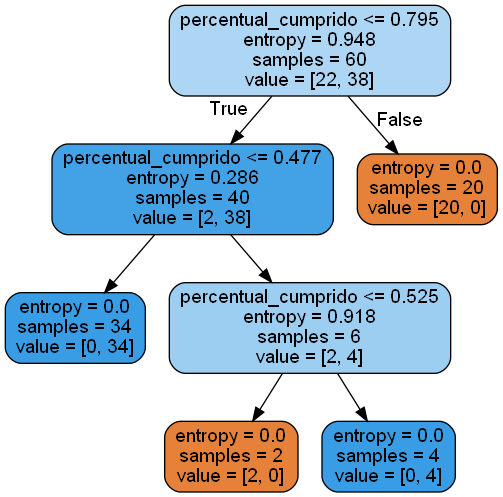

In [63]:
#Lista de Campos do dataset
features = list(Xc_treino)

dot_data = io.StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=features, filled=True, rounded=True)

graph = pydotplus.graphviz.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png()) 

#### Analisando importancia de cada variável

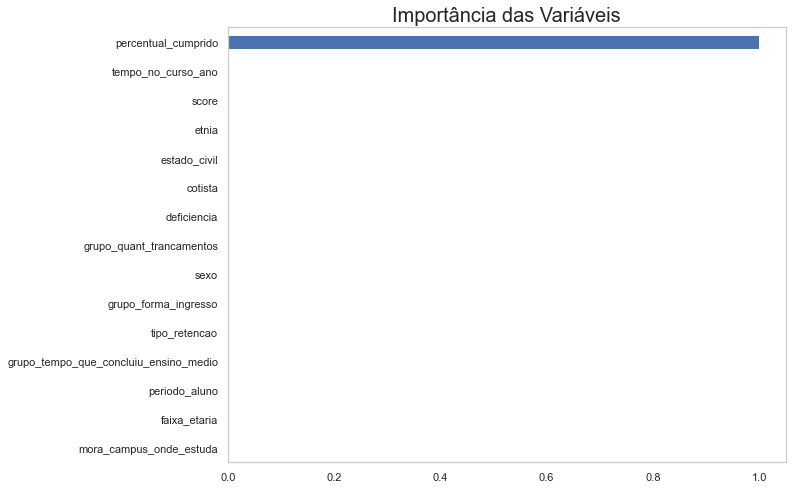

In [64]:
feature_importances = pd.DataFrame(dtree.feature_importances_, index=Xc_treino.columns, columns=['importance']).sort_values('importance', ascending = True)
feature_importances.plot(kind='barh', figsize=(10,8), grid=False, legend=False)
plt.title('Importância das Variáveis', fontsize=20)
print('\n')

Com a informação de quais variáveis são mais importantes, é possível treinar novamente o modelo apenas com aquelas que possuem maior importância para o modelo.

---

## Random Florest

Agora vamos treinar várias árvores de decisão.    
Continuaremos utilizando o datase **sem dummies** e com variáveis codificadas.

In [65]:
rfc = RandomForestClassifier(n_estimators=300, bootstrap=True, random_state=17, verbose=0, max_depth=10, )
rfc.fit(Xc_treino, yc_treino.values.ravel())

y_pred_rfc = rfc.predict(Xc_teste)
y_pred_rfc_prob = rfc.predict_proba(Xc_teste)[:, 1]

#### Avaliação da Floresta

##### Matriz de confusão

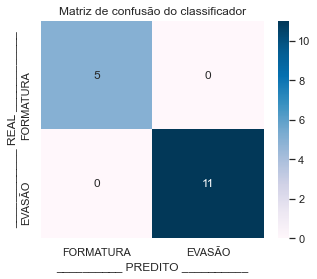

In [66]:
cm = confusion_matrix(yc_teste, y_pred_rfc)
df_cm = pd.DataFrame(cm, index = ['FORMATURA', 'EVASÃO'], columns = ['FORMATURA', 'EVASÃO'])

plt.figure(figsize=(5,4))
sns.heatmap(df_cm, cmap='PuBu', annot=True, fmt="d")
plt.title('Matriz de confusão do classificador')
plt.xlabel('__________ PREDITO __________')
plt.ylabel('____________ REAL ____________')
print('\n')

##### Métricas

In [67]:
print(classification_report(yc_teste, y_pred_rfc, target_names=['FORMATURA', 'EVASÃO']))

              precision    recall  f1-score   support

   FORMATURA       1.00      1.00      1.00         5
      EVASÃO       1.00      1.00      1.00        11

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



#### Analisando importancia de cada variável

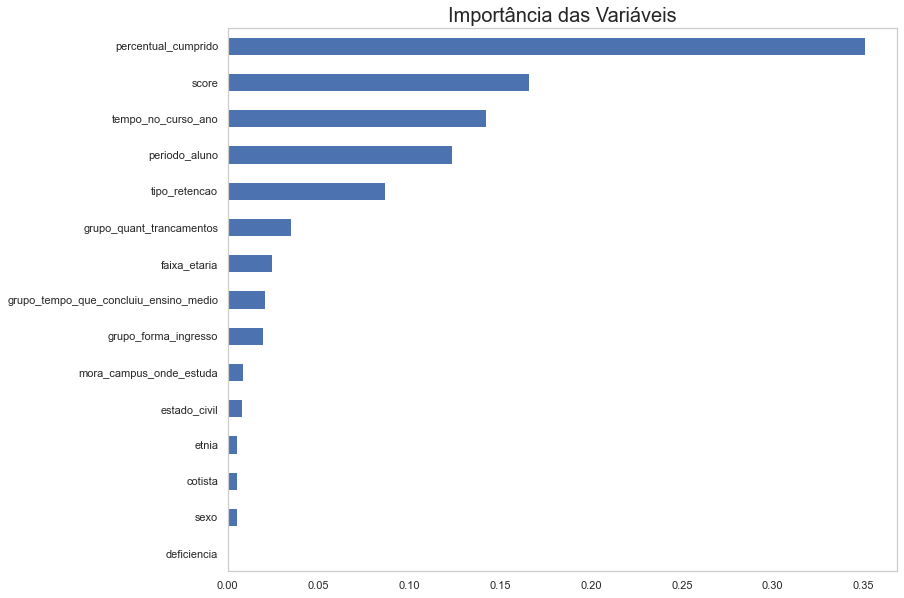

In [68]:
feature_importances = pd.DataFrame(rfc.feature_importances_, index=Xc_treino.columns, columns=['importance']).sort_values('importance', ascending = True)
feature_importances.plot(kind='barh', figsize=(12,10), grid=False, legend=False)
plt.title('Importância das Variáveis', fontsize=20)
print('\n')

---

## XGBoost

São árvores de decisão impulsionadas.   
Para este modelo, o dataset com variáveis **dummies** é mais adequado.

##### Buscar valores dos principais hiperparametros que aumentam o desempenho do modelo. Utilizando GridSearch.

In [69]:
#Atribui valores iniciais aos principais parâmetros
xgbt = XGBClassifier(
            booster='gbtree',
            learning_rate=0.1,    #gridsearch [0.01-0.3]
            min_child_weight=1,   #gridsearch
            max_depth=6,          #gridsearch 3-10
            gamma=0, 
            subsample=0.8,        #gs [0.5-1]
            colsample_bytree=0.8, #gs [0.5-1]
            scale_pos_weight=1.0,
            objective='binary:logistic',
            eval_metric='logloss',
            n_estimators=300,
            #nthread=4,
            use_label_encoder=False,
            seed=17
            )

#Cross validation Stratified
cvs = RepeatedStratifiedKFold(n_repeats=4, n_splits=6, random_state=17)

#Grade de parâmetros
xgb_param_grid = {
    'learning_rate': np.array([0.01, 0.05, 0.1, 0.2]),
    'n_estimators' : np.array([100, 200, 500]),
    'subsample'    : np.array([0.7, 0.8, 0.9]),
    'max_depth'    : np.array([6, 8, 10]),
    'lambda'       : np.array([1]),
    'gamma'        : np.array([0]),
    'colsample_bytree': np.arange(0.5, 0.7, 0.8),
    'booster': np.array(['gbtree'])
    }
xgb_gs = GridSearchCV(
                estimator=xgbt, 
                param_grid=xgb_param_grid, 
                n_jobs=-1, 
                scoring='roc_auc', #'f1_weighted', 
                verbose=0, 
                refit=True,
                cv=cvs
                ) 
#scoring='roc_auc' #Testar depois

#Treina modelo com os parâmetros de melhor desempenho
xgb_gs.fit(Xd_treino, yd_treino)

#Treinei o estimador original com os parametros otimizados para ser usado em plot_importance
xgbt = xgb_gs.estimator
xgbt.fit(Xd_treino, yd_treino)

#Predição
y_pred_xgb = xgb_gs.predict(Xd_teste)
y_pred_xgb_prob = xgb_gs.predict_proba(Xd_teste)[:, 1]

#Melhores parametros
print("\nMelhores Hiper Parâmetros:\n")
for parametro in xgb_gs.best_params_: print(f"{parametro:<17} = {str(xgb_gs.best_params_[parametro]):>8}")
#Melhor score
print("\nMelhor Score:", round(xgb_gs.best_score_, 4))


Melhores Hiper Parâmetros:

booster           =   gbtree
colsample_bytree  =      0.5
gamma             =        0
lambda            =        1
learning_rate     =     0.01
max_depth         =        6
n_estimators      =      100
subsample         =      0.7

Melhor Score: 1.0


<br>

#### Avaliação

##### Matriz de confusão

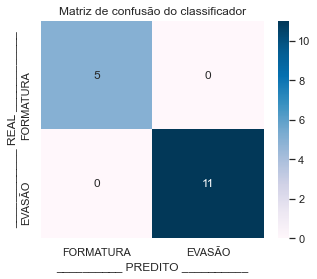

In [70]:
cm = confusion_matrix(yd_teste, y_pred_xgb)
df_cm = pd.DataFrame(cm, index = ['FORMATURA', 'EVASÃO'], columns = ['FORMATURA', 'EVASÃO'])

plt.figure(figsize=(5,4))
sns.heatmap(df_cm, cmap='PuBu', annot=True, fmt="d")
plt.title('Matriz de confusão do classificador')
plt.xlabel('__________ PREDITO __________')
plt.ylabel('____________ REAL ____________')
print('\n')

##### Métricas

In [71]:
print(classification_report(yd_teste, y_pred_xgb, target_names=['FORMATURA', 'EVASÃO']))

              precision    recall  f1-score   support

   FORMATURA       1.00      1.00      1.00         5
      EVASÃO       1.00      1.00      1.00        11

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



#### Analisando importancia de cada variável

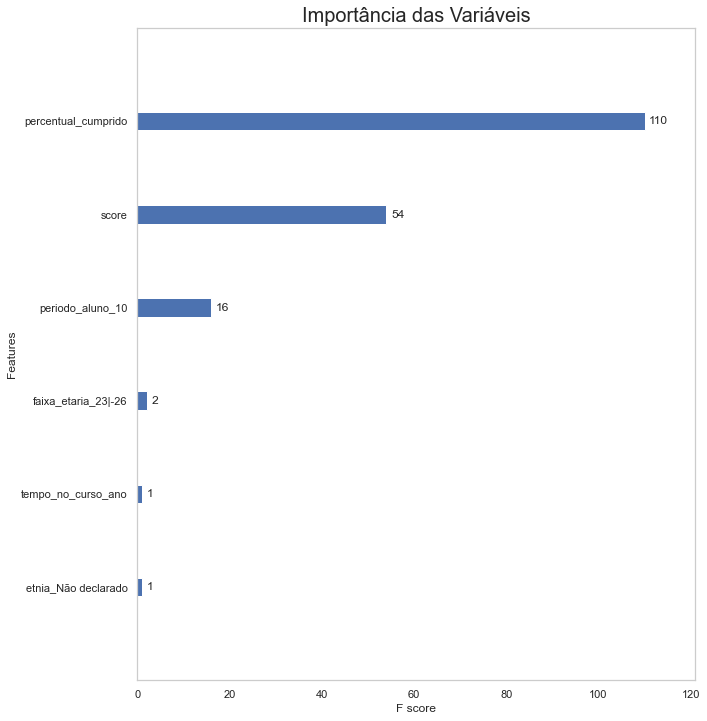

In [72]:
#Analisando a importância de cada variável
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgbt, ax=ax, grid=False)
plt.title('Importância das Variáveis', fontsize=20)
print('\n')

---

## SVM

Support Vector Machine.   
Para este modelo, o dataset com variáveis **dummies** é mais adequado.

##### Buscar valores dos principais hiperparametros que aumentam o desempenho do modelo. Utilizando GridSearch.

In [73]:
#Atribui valores iniciais aos principais parâmetros
svm_ori = SVC(kernel='linear', 
              C=1, 
              gamma=1, 
              probability=True,
              random_state=17           
             )

#Cross Validation Stratified
cvs = RepeatedStratifiedKFold(n_repeats=4, n_splits=6, random_state=17)

#Grade de parâmetros
svm_param_grid = {
    'kernel': np.array(['rbf', 'poly', 'linear']),
    'gamma' : np.array([0.01, 0.1, 1, 10, 50]),
    'C'     : np.array([0.01, 0.1, 1, 10, 50])
    }
svm_gs = GridSearchCV(
                estimator=svm_ori, 
                param_grid=svm_param_grid, 
                n_jobs=-1, 
                scoring='roc_auc', #'f1_weighted', #roc_auc
                verbose=0, 
                refit=True,
                cv=cvs
                ) 

#Treina modelo com os parâmetros de melhor desempenho
svm_gs.fit(Xd_treino, yd_treino.values.ravel())

#Treinei o estimador original com os parametros otimizados para ser usado em plot_importance
svm_ori = svm_gs.estimator
svm_ori.fit(Xd_treino, yd_treino.values.ravel())

#Predição
y_pred_svm = svm_gs.predict(Xd_teste)
y_pred_svm_prob = svm_gs.predict_proba(Xd_teste)[:, 1]

#Melhores parametros
print("\nMelhores Hiper Parâmetros:\n")
for parametro in svm_gs.best_params_: print(f"{parametro:<6} = {str(svm_gs.best_params_[parametro]):>10}")
#Melhor score
print("\nMelhor Score:", round(svm_gs.best_score_, 4))


Melhores Hiper Parâmetros:

C      =        1.0
gamma  =       0.01
kernel =     linear

Melhor Score: 1.0


<br>

#### Avaliação

##### Matriz de confusão

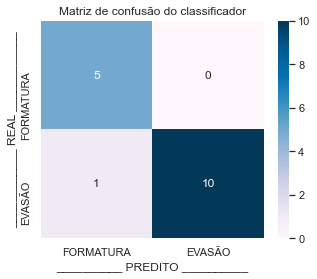

In [74]:
cm = confusion_matrix(yd_teste, y_pred_svm)
df_cm = pd.DataFrame(cm, index = ['FORMATURA', 'EVASÃO'], columns = ['FORMATURA', 'EVASÃO'])

plt.figure(figsize=(5,4))
sns.heatmap(df_cm, cmap='PuBu', annot=True, fmt="d")
plt.title('Matriz de confusão do classificador')
plt.xlabel('__________ PREDITO __________')
plt.ylabel('____________ REAL ____________')
print('\n')

##### Métricas

In [75]:
print(classification_report(yd_teste, y_pred_svm, target_names=['FORMATURA', 'EVASÃO']))

              precision    recall  f1-score   support

   FORMATURA       0.83      1.00      0.91         5
      EVASÃO       1.00      0.91      0.95        11

    accuracy                           0.94        16
   macro avg       0.92      0.95      0.93        16
weighted avg       0.95      0.94      0.94        16



<br> 

# <font color='#457B9D'><strong>Avaliação dos Modelos</strong></font><a class="anchor" id="5"></a> [$\;\;\;\;\;\Uparrow$](#topo)
---

##  Curva ROC

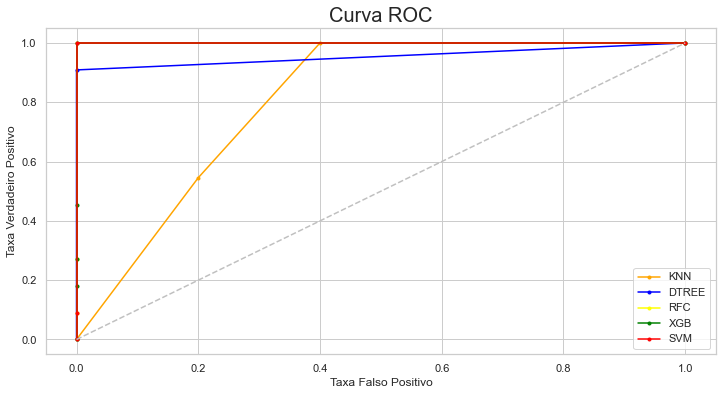

In [76]:
# Estimandores de probabilidades
#------- KNN -----------------------------------
knn_prob = knn.predict_proba(Xd_teste)[:, 1]
tfp_knn, tvp_knn, _ = roc_curve(yd_teste, knn_prob)
#tfp_knn, tvp_knn, _ = roc_curve(y_pred_knn, knn_prob)
area_knn = auc(tfp_knn, tvp_knn)

#------- DECISION TREE --------------------------
dtree_prob = dtree.predict_proba(Xc_teste)[:, 1]
#tfp_dtree, tvp_dtree, _ = roc_curve(yc_teste, y_pred_dtree)
tfp_dtree, tvp_dtree, _ = roc_curve(yc_teste, dtree_prob)
#tfp_dtree, tvp_dtree, _ = roc_curve(y_pred_dtree, dtree_prob)
area_dtree = auc(tfp_dtree, tvp_dtree)

#------- RANDOM FLOREST --------------------------
rfc_prob = rfc.predict_proba(Xc_teste)[:, 1]
tfp_rfc, tvp_rfc, _ = roc_curve(yc_teste, rfc_prob)
#tfp_rfc, tvp_rfc, _ = roc_curve(yc_teste, y_pred_rfc)
#tfp_rfc, tvp_rfc, _ = roc_curve(y_pred_rfc, rfc_prob)
area_rfc = auc(tfp_rfc, tvp_rfc)

#------- XGBOOST --------------------------
xgb_prob = xgb_gs.predict_proba(Xd_teste)[:, 1]
tfp_xgb, tvp_xgb, _ = roc_curve(yd_teste, xgb_prob)
area_xgb = auc(tfp_xgb, tvp_xgb)

#------- SVM --------------------------
svm_prob = svm_gs.predict_proba(Xd_teste)[:, 1]
tfp_svm, tvp_svm, _ = roc_curve(yd_teste, svm_prob)
area_svm = auc(tfp_svm, tvp_svm)


plt.figure(figsize=(12,6))

#plot dos modelos
plt.plot(tfp_knn, tvp_knn, marker='.', label='KNN', color="orange")
plt.plot(tfp_dtree, tvp_dtree, marker='.', label='DTREE', color="blue")
plt.plot(tfp_rfc, tvp_rfc, marker='.', label='RFC', color="yellow")
plt.plot(tfp_xgb, tvp_xgb, marker='.', label='XGB', color="green")
plt.plot(tfp_svm, tvp_svm, marker='.', label='SVM', color="red")

#Linha reta diagonal
plt.plot([0, 1], [0, 1], color='silver', linestyle='--')
plt.xlabel('Taxa Falso Positivo')
plt.ylabel('Taxa Verdadeiro Positivo')
plt.title('Curva ROC', fontdict={'fontsize': 20})
plt.legend(loc=4)
print('\n')

## Área sob a Curva ROC


In [77]:
print('\n')
print("Área sob a Curva ROC:\n")

cv = RepeatedStratifiedKFold(n_repeats=4, n_splits=6, random_state=17)

score_knn = round(np.mean(cross_val_score(knn, Xd_treino, yd_treino.values.ravel(), cv=cv, scoring='roc_auc')), 4)
score_dtree = round(np.mean(cross_val_score(dtree, Xc_treino, yc_treino.values.ravel(), cv=cv, scoring='roc_auc')), 4)
score_rfc = round(np.mean(cross_val_score(rfc, Xc_treino, yc_treino.values.ravel(), cv=cv, scoring='roc_auc')), 4)
score_xgb = round(np.mean(cross_val_score(xgbt, Xd_treino, yd_treino.values.ravel(), cv=cv, scoring='roc_auc', verbose=0)), 4)
score_svm = round(np.mean(cross_val_score(svm_ori, Xd_treino, yd_treino.values.ravel(), cv=cv, scoring='roc_auc', verbose=0)), 4)

espacoL = 16
espacoR = 7
print(f"{'KNN:':<{espacoL}}{score_knn:>{espacoR}}")
print(f"{'Decision Tree:':<{espacoL}}{score_dtree:>{espacoR}}")
print(f"{'Random Florest:':<{espacoL}}{score_rfc:>{espacoR}}")
print(f"{'XGBoost:':<{espacoL}}{score_xgb:>{espacoR}}")
print(f"{'SVM:':<{espacoL}}{score_svm:>{espacoR}}")




Área sob a Curva ROC:

KNN:             0.9603
Decision Tree:   0.9333
Random Florest:  0.9983
XGBoost:            1.0
SVM:                1.0


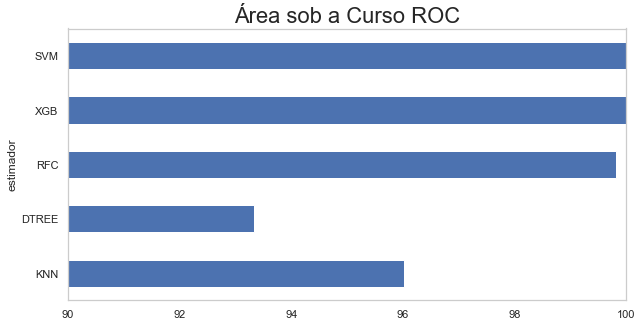

In [78]:
scores_auc = {
    "estimador": ['KNN', 'DTREE', 'RFC', 'XGB', 'SVM'],
    "score": [score_knn, score_dtree, score_rfc, score_xgb, score_svm]
    }

df_auc = pd.DataFrame(scores_auc).set_index('estimador')
df_auc['score'] = df_auc['score'] * 100
xlim_min = int((df_auc.score.min() - 1) / 10) * 10
df_auc.plot(kind='barh', figsize=(10,5), legend=False, grid=False, xlim=[xlim_min, 100])
plt.title('Área sob a Curso ROC', fontsize = 22)
print('\n')

<br>

# <font color='#457B9D'><strong>Unir força os dois melhores modelos (Ensemble)</strong></font><a class="anchor" id="6"></a> [$\;\;\;\;\;\Uparrow$](#topo)

---

A combinação dos dois melhores modelos, Random Forest e XGBoost, utilizando o método Ensemble, poderá proporcionar resultados mais precisos.   
A previsão mais votada é escolhida

In [79]:
from sklearn.ensemble import VotingClassifier
voto = VotingClassifier(estimators=[('rfc', rfc),('xgb',xgbt)], voting='soft', n_jobs=-1) 
voto = voto.fit(Xd_treino, yd_treino.values.ravel())
y_pred_voto = voto.predict(Xd_teste)
y_pred_voto_prob = voto.predict_proba(Xd_teste)[:, 1]

#### Avaliação

##### Matriz de confusão

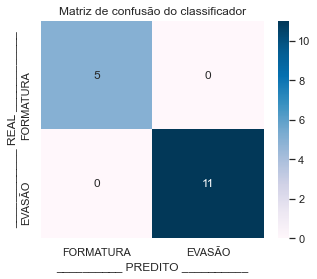

In [80]:
cm = confusion_matrix(yd_teste, y_pred_voto)
df_cm = pd.DataFrame(cm, index = ['FORMATURA', 'EVASÃO'], columns = ['FORMATURA', 'EVASÃO'])

plt.figure(figsize=(5,4))
sns.heatmap(df_cm, cmap='PuBu', annot=True, fmt="d")
plt.title('Matriz de confusão do classificador')
plt.xlabel('__________ PREDITO __________')
plt.ylabel('____________ REAL ____________')
print('\n')

##### Métricas

In [81]:
print(classification_report(yd_teste, y_pred_voto, target_names=['FORMATURA', 'EVASÃO']))

              precision    recall  f1-score   support

   FORMATURA       1.00      1.00      1.00         5
      EVASÃO       1.00      1.00      1.00        11

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



<br> 

# <font color='#457B9D'><strong>Relação de alunos ativos com grande possibilidade de evasão</strong></font><a class="anchor" id="7"></a> [$\;\;\;\;\;\Uparrow$](#topo)
---

Os modelos treinados e avaliados receberão dados de alunos que ainda não egressaram, portanto ainda estão ativos e não possuem rótulos.   
Os alunos com maior probabilidade de evadir serão calculado da seguinte forma: 
* Média harmônica entre as probabilidades de evadir dada pelo **Random Florest** e pelo **XGBoost**, modelos com melhores desempenho
    * Média Harmônica:  $\dfrac{2}{\dfrac{1}{prob\_random\_florest} + \dfrac{1}{prob\_xgboost}}$


* Dos mais propensos a evadir, o máximo entre 20 alunos e 10% da quantidade de alunos ativos serão selecionados para serem encaminhados aos colegiados

<br>


### Exibe os alunos com maior probabilidade de evadir

In [82]:
#Prever probabilidade da classe evasão para os alunos ativos
y_ativos_rfc_prob = rfc.predict_proba(Xc_ativos)[:, 1]
y_ativos_xgb_prob = xgb_gs.predict_proba(Xd_ativos)[:, 1]

#Converte em dataframe as probabilidade
df_y_ativos_rfc = pd.DataFrame({"y_pred_rfc": y_ativos_rfc_prob})
df_y_ativos_xgb = pd.DataFrame({"y_pred_xgb": y_ativos_xgb_prob})

#Junta os dataframes com as probabilidades de evasão calculada por diferentes modelos
df_evasao = pd.concat([Xc_ativos.reset_index(), df_y_ativos_rfc, df_y_ativos_xgb], axis=1)[['id_cript', 'y_pred_rfc', 'y_pred_xgb']] # Apenas os escolhidos
#Calcula a média harmônica entre as probabilidades calculadas por cada modelo usado
df_evasao['y_pred_mh'] = round(2 / (1/df_evasao['y_pred_rfc'] + 1/df_evasao['y_pred_xgb']) * 100, 1) #Média harmônica

#Exibi quantidade de alunos ativos
quant_ativos = Xc_ativos.shape[0]
quant_exibido = int(max(20, 0.1 * quant_ativos))

print('\n')
print(quant_ativos, 'alunos ativos')
print(quant_exibido, 'mais propensos a evadir sendo exibido\n')


#Filtra probabilidade maior que 50%
filtro = df_evasao['y_pred_mh'] > 50

#Probabilidade de evadir = média harmonica entre rfc e xgb
df_evasao_mh = df_evasao.loc[filtro, ['id_cript', 'y_pred_mh']].sort_values(['y_pred_mh'], ascending=False)
df_evasao_mh = df_evasao_mh[0:quant_exibido].set_index('id_cript')

df_evasao_mh



23 alunos ativos
20 mais propensos a evadir sendo exibido



,y_pred_mh
id_cript,
20001080100020908,86.9
20001090101090202,86.8
20001090102020806,84.1
20001070100070809,83.7
20001090102050001,81.7
20001080100080204,80.3
20001090101090102,79.5
20001080100000009,78.8
20001080100040108,78.3
